# Uczenie Maszynowe - Wykład 4



# Klasyfikacja

## Wprowadzenie do klasyfikacji


Klasyfikacja to jedno z kluczowych zadań uczenia maszynowego, polegające na przypisywaniu nowych danych do jednej lub więcej zdefiniowanych kategorii. Jest szeroko stosowana w różnych dziedzinach, takich jak analiza tekstu, rozpoznawanie obrazów, medycyna czy prognozowanie finansowe.


## **Czym jest klasyfikacja?**

Klasyfikacja polega na opracowaniu funkcji decyzyjnej, która na podstawie zestawu cech wejściowych określa, do której kategorii (klasy) należy dany obiekt. Algorytm uczy się tej funkcji na podstawie oznaczonych danych treningowych, które zawierają przykłady z przypisanymi etykietami klas.

### **Rodzaje klasyfikacji**

1. **Klasyfikacja binarna**:
   - Dane są przypisywane do jednej z dwóch klas.
   - Przykład: Czy email jest spamem? (Spam/nie-spam)

2. **Klasyfikacja wieloklasowa**:
   - Dane mogą należeć do jednej z wielu klas.
   - Przykład: Rozpoznawanie gatunków kwiatów (setosa, versicolor, virginica).

3. **Klasyfikacja wieloetykietowa**:
   - Dane mogą należeć do więcej niż jednej klasy jednocześnie.
   - Przykład: Oznaczanie tematów w artykułach (sport, technologia, polityka).

---

## **Przykłady zastosowań klasyfikacji**

1. **Medycyna**:
   - Diagnoza chorób na podstawie wyników badań (zdrowy/chory).
2. **Analiza tekstu**:
   - Klasyfikacja wiadomości email (spam/nie-spam).
   - Analiza sentymentu (pozytywny/negatywny).
3. **Rozpoznawanie obrazów**:
   - Identyfikacja obiektów na zdjęciach (kot/pies).
4. **Finanse**:
   - Przewidywanie ryzyka kredytowego (dobra/zła zdolność kredytowa).
5. **Inżynieria i przemysł**:
   - Wykrywanie usterek w maszynach (działa/nie działa).

---

## **Jak działa klasyfikacja?**

1. **Zbiór danych treningowych**:
   - Algorytm otrzymuje zbiór przykładów, gdzie każda próbka jest oznaczona etykietą klasy.

2. **Budowa modelu**:
   - Algorytm tworzy reguły (funkcję decyzyjną), które pozwalają przypisać nowe dane do odpowiednich klas.

3. **Ocena modelu**:
   - Model jest testowany na danych testowych, które nie były używane podczas treningu.

4. **Przewidywanie**:
   - Model przypisuje nowe próbki do odpowiednich klas na podstawie wyuczonych reguł.

---

## **Podstawowe algorytmy klasyfikacyjne**

1. **Regresja logistyczna**:
   - Klasyczny algorytm do binarnej klasyfikacji, który przewiduje prawdopodobieństwo przynależności do danej klasy.

2. **k-Nearest Neighbors (k-NN)**:
   - Algorytm oparty na odległościach; przypisuje klasę na podstawie najbliższych sąsiadów w przestrzeni cech.

3. **Drzewa decyzyjne**:
   - Tworzą strukturę drzewa, gdzie każdy węzeł reprezentuje decyzję opartą na cechach danych.

4. **Naive Bayes**:
   - Algorytm probabilistyczny zakładający niezależność cech; często używany w klasyfikacji tekstu.

5. **Support Vector Machines (SVM)**:
   - Algorytm, który maksymalizuje margines między klasami, świetnie sprawdza się w przypadku złożonych granic decyzyjnych.

---

## **Granica decyzyjna**

Granica decyzyjna to linia (lub powierzchnia w wielowymiarowej przestrzeni), która oddziela różne klasy. W klasyfikacji kluczowe jest, aby granica decyzyjna była dobrze dopasowana do danych:
- **Overfitting**: Granica zbyt dokładnie odzwierciedla dane treningowe, przez co model nie generalizuje.
- **Underfitting**: Granica jest zbyt prosta, przez co model ignoruje ważne wzorce w danych.

---


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
from ipywidgets import interact

# Generate synthetic dataset
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Interactive function for classification
def interactive_classification(C=1.0, kernel='rbf', gamma=1.0):
    # Train SVM model with specified parameters
    model = SVC(C=C, kernel=kernel, gamma=gamma)
    model.fit(X_train, y_train)
    
    # Predict and calculate accuracy
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    
    # Plot decision boundary
    plt.figure(figsize=(12, 6))
    
    # Create mesh grid for decision boundary
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and data points
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Training Data', edgecolor='k')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', label='Test Data', edgecolor='k')
    
    # Titles and labels
    plt.title(f"SVM Decision Boundary\nTrain Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive widgets for parameters
interact(
    interactive_classification,
    C=widgets.FloatLogSlider(value=1.0, base=10, min=-2, max=2, step=0.1, description='C (Regularization)'),
    kernel=widgets.RadioButtons(options=['linear', 'rbf', 'poly'], value='rbf', description='Kernel'),
    gamma=widgets.FloatLogSlider(value=1.0, base=10, min=-2, max=2, step=0.1, description='Gamma')
)


interactive(children=(FloatLogSlider(value=1.0, description='C (Regularization)', max=2.0, min=-2.0), RadioBut…

<function __main__.interactive_classification(C=1.0, kernel='rbf', gamma=1.0)>

# **Jak algorytmy klasyfikacyjne uczą się na przykładzie regresji logistycznej**

Algorytmy klasyfikacyjne uczą się przez proces optymalizacji, którego celem jest zminimalizowanie błędu predykcji. Na przykładzie regresji logistycznej możemy prześledzić, jak działa proces uczenia i jakie kroki są podejmowane, aby model poprawnie klasyfikował dane.

---

## **1. Funkcja decyzyjna w regresji logistycznej**

Regresja logistyczna to algorytm klasyfikacyjny stosowany do zadań binarnej klasyfikacji. Funkcja decyzyjna jest określona jako:

$$
P(y=1 | x) = \sigma(w^T x + b)
$$

gdzie:
- $ \sigma(z) = \frac{1}{1 + e^{-z}} $ – funkcja sigmoid (przekształca wyniki w zakres $ (0, 1) $),
- $ w $ – wektor wag,
- $ x $ – wektor cech,
- $ b $ – bias (przesunięcie).

Funkcja sigmoid zwraca prawdopodobieństwo przynależności próbki do klasy $ y=1 $.

---

## **2. Funkcja kosztu (Log-Loss)**

Aby nauczyć model odpowiednich wartości wag $ w $ i biasu $ b $, należy zdefiniować funkcję kosztu, która mierzy, jak dobrze model dopasowuje się do danych treningowych. W regresji logistycznej funkcją kosztu jest logarytmiczna funkcja straty (log-loss):

$$
\mathcal{L}(w, b) = -\frac{1}{N} \sum_{i=1}^N \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

gdzie:
- $ y_i $ – prawdziwa etykieta dla próbki $ i $,
- $ \hat{y}_i = P(y=1 | x_i) $ – przewidywane prawdopodobieństwo przez model,
- $ N $ – liczba próbek w zbiorze treningowym.

Funkcja kosztu karze za błędne przewidywania, szczególnie te o wysokim poziomie pewności.

---

## **3. Optymalizacja funkcji kosztu**

Uczenie się modelu polega na minimalizacji funkcji kosztu. Proces optymalizacji składa się z następujących kroków:

### **Krok 1: Inicjalizacja parametrów**
- Początkowe wartości wag $ w $ i biasu $ b $ są ustawiane losowo lub na zero.

### **Krok 2: Obliczanie gradientu**
- Gradient to wektor pochodnych funkcji kosztu względem parametrów $ w $ i $ b $:
  $$
  \frac{\partial \mathcal{L}}{\partial w_j} = \frac{1}{N} \sum_{i=1}^N ( \hat{y}_i - y_i ) x_{ij}
  $$
  $$
  \frac{\partial \mathcal{L}}{\partial b} = \frac{1}{N} \sum_{i=1}^N ( \hat{y}_i - y_i )
  $$
- Gradient wskazuje kierunek największego wzrostu funkcji kosztu.

### **Krok 3: Aktualizacja parametrów**
- Parametry są aktualizowane w kierunku przeciwnym do gradientu, aby minimalizować funkcję kosztu. Jest to realizowane za pomocą algorytmu **gradient descent**:
  $$
  w_j := w_j - \eta \frac{\partial \mathcal{L}}{\partial w_j}
  $$
  $$
  b := b - \eta \frac{\partial \mathcal{L}}{\partial b}
  $$
  gdzie $ \eta $ to współczynnik uczenia (ang. *learning rate*).

### **Krok 4: Iteracje**
- Proces obliczania gradientu i aktualizacji parametrów jest powtarzany przez wiele iteracji (epok), aż do osiągnięcia minimalnej wartości funkcji kosztu lub spełnienia innego kryterium stopu.

---

## **4. Wpływ hiperparametrów funkcji optymalizacyjnej**

### **Współczynnik uczenia ($ \eta $)**
- **Zbyt mały**: Proces uczenia jest wolny, może utknąć w minimum lokalnym.
- **Zbyt duży**: Model może przeskakiwać minimum globalne, co prowadzi do niestabilności.

### **Liczba iteracji**
- Zbyt mała liczba iteracji powoduje niedouczenie modelu (ang. *underfitting*).
- Zbyt duża liczba iteracji może prowadzić do przeuczenia modelu (ang. *overfitting*).

---


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
from ipywidgets import interact

# Generate synthetic dataset
X, y = make_classification(
    n_samples=300, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0, 
    n_clusters_per_class=1, 
    class_sep=1.5, 
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Interactive function for logistic regression
def interactive_logistic(C=1.0):
    # Train logistic regression model with specified regularization strength
    model = LogisticRegression(C=C, solver='lbfgs', random_state=42)
    model.fit(X_train, y_train)
    
    # Predict and calculate accuracy
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    
    # Plot decision boundary
    plt.figure(figsize=(12, 6))
    
    # Create mesh grid for decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and data points
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Training Data', edgecolor='k', alpha=0.7)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', label='Test Data', edgecolor='k', alpha=0.7)
    
    # Titles and labels
    plt.title(f"Logistic Regression Decision Boundary (C={C})\nTrain Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive widgets for regularization parameter C
interact(
    interactive_logistic,
    C=widgets.FloatLogSlider(value=1.0, base=10, min=-3, max=3, step=0.1, description='C (Regularization)')
)


interactive(children=(FloatLogSlider(value=1.0, description='C (Regularization)', max=3.0, min=-3.0), Output()…

<function __main__.interactive_logistic(C=1.0)>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
from ipywidgets import interact

# Generate synthetic dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Interactive function for logistic regression with polynomial features
def interactive_logistic_regression(degree=1, C=1.0):
    # Add polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Standardize the data
    scaler = StandardScaler()
    X_train_poly = scaler.fit_transform(X_train_poly)
    X_test_poly = scaler.transform(X_test_poly)
    
    # Train logistic regression model
    model = LogisticRegression(C=C, max_iter=500, random_state=42)
    model.fit(X_train_poly, y_train)
    
    # Predict and calculate accuracy
    y_pred_train = model.predict(X_train_poly)
    y_pred_test = model.predict(X_test_poly)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    
    # Plot decision boundary
    plt.figure(figsize=(12, 6))
    
    # Create mesh grid for decision boundary
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and data points
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Training Data', edgecolor='k')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', label='Test Data', edgecolor='k')
    
    # Titles and labels
    plt.title(f"Logistic Regression with Polynomial Features (Degree={degree})\nTrain Accuracy: {train_acc:.2f}, Test Accuracy: {test_acc:.2f}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive widgets for parameters
interact(
    interactive_logistic_regression,
    degree=widgets.IntSlider(min=1, max=10, step=1, value=1, description='Degree'),
    C=widgets.FloatLogSlider(value=1.0, base=10, min=-2, max=2, step=0.1, description='C (Regularization)')
)


interactive(children=(IntSlider(value=1, description='Degree', max=10, min=1), FloatLogSlider(value=1.0, descr…

<function __main__.interactive_logistic_regression(degree=1, C=1.0)>

# **Miary oceny w klasyfikacji**

Ocena modeli klasyfikacyjnych jest kluczowa dla zrozumienia, jak dobrze model radzi sobie z przypisywaniem próbek do odpowiednich klas. Poniżej znajdują się najważniejsze miary stosowane w klasyfikacji wraz z ich zastosowaniem.

---

## **1. Macierz pomyłek (Confusion Matrix)**

Macierz pomyłek to tablica, która pokazuje liczbę poprawnych i błędnych klasyfikacji dla każdej klasy. Składa się z czterech kluczowych wartości (dla klasyfikacji binarnej):

- **True Positive (TP)**: Próbki poprawnie zaklasyfikowane jako pozytywne.
- **True Negative (TN)**: Próbki poprawnie zaklasyfikowane jako negatywne.
- **False Positive (FP)**: Próbki błędnie zaklasyfikowane jako pozytywne (tzw. fałszywe alarmy).
- **False Negative (FN)**: Próbki błędnie zaklasyfikowane jako negatywne.

|                 | Predykcja pozytywna | Predykcja negatywna |
|-----------------|---------------------|---------------------|
| **Prawdziwie pozytywne (TP)** | Liczba próbek     | -                   |
| **Fałszywie pozytywne (FP)** | Liczba próbek     | -                   |
| **Fałszywie negatywne (FN)** | -                 | Liczba próbek       |
| **Prawdziwie negatywne (TN)** | -                 | Liczba próbek       |

---

## **2. Accuracy (dokładność)**

Accuracy mierzy odsetek poprawnie zaklasyfikowanych próbek w całym zbiorze danych:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

- **Zaleta**: Proste do zrozumienia i obliczenia.
- **Wada**: Niewystarczające w przypadku danych niezbalansowanych (np. 95% próbek w jednej klasie).

---

## **3. Precision (precyzja)**

Precyzja to miara dokładności przewidywań dla klasy pozytywnej:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

- **Zastosowanie**: Ważna, gdy zależy nam na minimalizacji fałszywych alarmów (np. klasyfikacja chorób rzadkich).

---

## **4. Recall (czułość, TPR)**

Czułość to miara zdolności modelu do wykrywania wszystkich próbek należących do klasy pozytywnej:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

- **Zastosowanie**: Ważna, gdy zależy nam na minimalizacji liczby przeoczonych przypadków (np. wykrywanie oszustw finansowych).

---

## **5. F1-Score**

F1-Score to harmoniczna średnia precyzji i czułości, która łączy te dwie miary w jedną:

$$
\text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

- **Zastosowanie**: Przydatna, gdy chcemy zrównoważyć precyzję i czułość, szczególnie w przypadku niezbalansowanych danych.

---

## **6. Specyficzność (Specificity, TNR)**

Specyficzność mierzy zdolność modelu do prawidłowego identyfikowania próbek należących do klasy negatywnej:

$$
\text{Specificity} = \frac{TN}{TN + FP}
$$

- **Zastosowanie**: Ważna w sytuacjach, gdy istotne jest minimalizowanie liczby fałszywych alarmów (np. systemy bezpieczeństwa).

---

## **7. NPV (Negative Predictive Value)**

NPV mierzy odsetek próbek zaklasyfikowanych jako negatywne, które rzeczywiście należą do klasy negatywnej:

$$
\text{NPV} = \frac{TN}{TN + FN}
$$

- **Zastosowanie**: Ważna w przypadkach, gdy chcemy dokładnie ocenić prawidłowość klasyfikacji negatywnych.

---

## **8. ROC Curve i AUC**

- **ROC Curve (Receiver Operating Characteristic Curve)**: Graficzna reprezentacja stosunku True Positive Rate (Recall) do False Positive Rate (FPR) dla różnych progów klasyfikacji:
  $$
  \text{FPR} = \frac{FP}{FP + TN}
  $$

- **AUC (Area Under the Curve)**: Miara jakości modelu. Wartość bliska 1 oznacza doskonały model, a wartość 0.5 wskazuje model losowy.

---

## **9. Log-Loss (logarytmiczna funkcja straty)**

Log-Loss mierzy pewność modelu w jego przewidywaniach poprzez uwzględnienie prawdopodobieństw:

$$
\text{Log-Loss} = -\frac{1}{N} \sum_{i=1}^N \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
$$

- **Zastosowanie**: Szczególnie ważna w modelach probabilistycznych, takich jak regresja logistyczna.

---

## **Podsumowanie**

- **Accuracy** jest łatwe w interpretacji, ale nie zawsze odpowiednie dla danych niezbalansowanych.
- **Precision** i **Recall** pozwalają lepiej zrozumieć wyniki dla danych, gdzie klasy są nierównomiernie reprezentowane.
- **F1-Score** pomaga zrównoważyć precyzję i czułość.
- **Specificity** i **NPV** są szczególnie istotne w analizie klasy negatywnej.
- **ROC Curve i AUC** umożliwiają ocenę zdolności modelu do rozróżniania klas dla różnych progów decyzyjnych.

Wybór odpowiedniej miary zależy od specyfiki problemu i tego, jakie błędy są bardziej kosztowne w danym kontekście.


interactive(children=(FloatLogSlider(value=1.0, description='C (Regularization)', max=2.0, min=-2.0), FloatSli…

<function __main__.interactive_classification_metrics(C=1.0, threshold=0.5)>

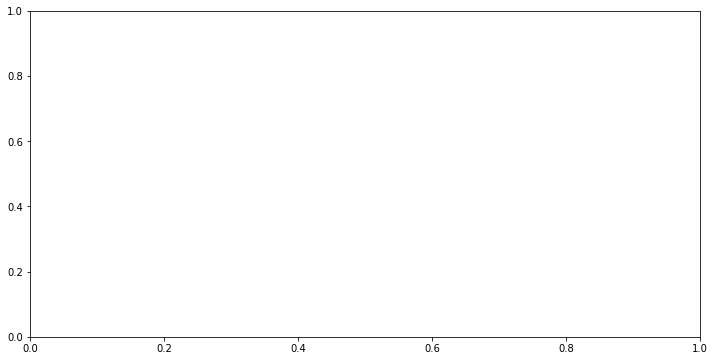

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import ipywidgets as widgets
from ipywidgets import interact

# Generate an imbalanced dataset (skrajny przypadek)
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.92, 0.08],  # Imbalanced classes (95% to 5%)
    random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Interactive function for classification metrics
def interactive_classification_metrics(C=1.0, threshold=0.5):
    # Train logistic regression model
    model = LogisticRegression(C=C, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict probabilities
    y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
    
    # Apply threshold
    y_pred = (y_probs >= threshold).astype(int)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot decision boundary and data points
    plt.figure(figsize=(12, 6))
    
    # Mesh grid for decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, levels=[0, threshold, 1], alpha=0.8, cmap='coolwarm', linestyles='dashed')
    
    # Plot data points
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired, alpha=0.6)
    plt.title(f"Decision Boundary (Threshold={threshold:.2f})\nAccuracy={acc:.2f}, Precision={precision:.2f}, Recall={recall:.2f}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar(label="Probability of Class 1")
    plt.grid(True)
    plt.show()

# Interactive widgets for parameters
interact(
    interactive_classification_metrics,
    C=widgets.FloatLogSlider(value=1.0, base=10, min=-2, max=2, step=0.1, description='C (Regularization)'),
    threshold=widgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=0.5, description='Threshold')
)


# **Niezbalansowanie klas w problemie klasyfikacyjnym**

Niezbalansowanie klas to sytuacja, w której liczba próbek jednej klasy znacząco różni się od liczby próbek innych klas w zbiorze danych. Jest to częsty problem w zadaniach klasyfikacyjnych, który może prowadzić do trudności w budowie skutecznych modeli.

---

## **Czym jest niezbalansowanie klas?**

W klasyfikacji binarnej występuje niezbalansowanie klas, gdy jedna klasa (np. pozytywna) jest reprezentowana przez znacznie mniej próbek niż druga klasa (np. negatywna). Klasa z większą liczbą próbek nazywana jest **klasą dominującą**, a klasa z mniejszą liczbą próbek to **klasa mniejszościowa**.

### **Przykłady niezbalansowania klas:**
- **Wykrywanie oszustw finansowych**:
  - 99,9% transakcji jest legalnych, tylko 0,1% to oszustwa.
- **Diagnostyka medyczna**:
  - Większość osób w badaniu jest zdrowa, tylko niewielka część jest chora.
- **Filtry antyspamowe**:
  - Większość wiadomości to normalne e-maile, a tylko niewielki procent to spam.

---

## **Dlaczego niezbalansowanie klas jest problemem?**

1. **Bias modelu w stronę klasy dominującej**:
   - Algorytmy uczące się optymalizują funkcję celu, często zakładając równomierny podział klas.
   - Model może ignorować klasę mniejszościową i osiągać wysoką dokładność (accuracy), ale kosztem niepoprawnej klasyfikacji próbek klasy mniejszościowej.

2. **Nieodpowiednie miary oceny**:
   - **Accuracy** może być mylące w przypadku niezbalansowanych danych.
     - Przykład: Jeśli 99% danych należy do klasy dominującej, model przewidujący zawsze tę klasę osiągnie dokładność 99%, ale nie będzie w ogóle skuteczny dla klasy mniejszościowej.

3. **Brak informacji w klasie mniejszościowej**:
   - Zbyt mała liczba próbek w klasie mniejszościowej ogranicza zdolność modelu do nauki wzorców związanych z tą klasą.

---

## **Jak radzić sobie z niezbalansowaniem klas?**

### **1. Przekształcanie danych**
- **Oversampling (nadpróbkowanie)**:
  - Tworzenie dodatkowych próbek dla klasy mniejszościowej, np. za pomocą technik takich jak SMOTE (Synthetic Minority Over-sampling Technique).
- **Undersampling (redukcja prób)**:
  - Zmniejszenie liczby próbek klasy dominującej poprzez losowe usunięcie ich części.
- **Generowanie syntetycznych danych**:
  - Tworzenie sztucznych próbek klasy mniejszościowej za pomocą modeli generatywnych.

### **2. Modyfikacja algorytmów**
- **Wagi klas**:
  - Dostosowanie algorytmu, aby karał bardziej za błędy w klasyfikacji klasy mniejszościowej (np. `class_weight` w scikit-learn).
- **Kosztowo-zorientowane uczenie**:
  - Użycie funkcji kosztu uwzględniającej różne wagi dla klas.

### **3. Dobór odpowiednich miar oceny**
- **Precision** i **Recall**:
  - Ważne miary, szczególnie w zadaniach z niezbalansowanymi danymi.
- **F1-Score**:
  - Harmoniczna średnia precyzji i czułości, odpowiednia dla niezbalansowanych danych.
- **ROC-AUC**:
  - Miara jakości modelu w rozróżnianiu klas niezależnie od progu decyzyjnego.
- **PR Curve (Precision-Recall Curve)**:
  - Wskazuje zależność między precyzją i czułością dla różnych progów, szczególnie przydatna w przypadku niezbalansowanych klas.

### **4. Zmiana progu decyzyjnego**
- Dostosowanie progu, przy którym próbki są klasyfikowane jako pozytywne, aby uwzględnić niezbalansowanie klas.

---

## **Przykład wpływu niezbalansowania klas**

Rozważmy zbiór danych, w którym 95% próbek należy do klasy negatywnej, a tylko 5% do klasy pozytywnej:
- Model przewidujący zawsze klasę negatywną osiągnie dokładność 95%, ale nie wykryje żadnej próbki klasy pozytywnej.
- Skupienie się na precyzji, czułości i F1-score pozwala lepiej ocenić model w kontekście klasy mniejszościowej.

---

## **Podsumowanie**

- Niezbalansowanie klas jest częstym problemem, który wpływa na skuteczność modeli klasyfikacyjnych.
- Odpowiednie przekształcenie danych, zmiana algorytmów i zastosowanie odpowiednich miar oceny pozwala skutecznie radzić sobie z tym wyzwaniem.
- Kluczowe jest zrozumienie, które błędy są bardziej kosztowne w danym problemie i dostosowanie strategii modelowania do tych potrzeb.



# **Błąd pierwszego i drugiego typu**

Błędy pierwszego i drugiego typu to kluczowe pojęcia w statystyce, uczeniu maszynowym i analizie danych, używane do opisania różnych rodzajów błędów popełnianych przez model lub test statystyczny.

---

## **1. Błąd pierwszego typu (Type I Error)**

### **Definicja**
Błąd pierwszego typu polega na **odrzuceniu hipotezy zerowej ($ H_0 $), gdy jest ona prawdziwa**. Oznacza to, że model lub test statystyczny wskazuje, że coś jest znaczące, podczas gdy w rzeczywistości tak nie jest.

### **Przykład**
- W medycynie:
  - Test diagnostyczny wskazuje, że pacjent jest chory, mimo że w rzeczywistości jest zdrowy (tzw. *fałszywy alarm*).
- W klasyfikacji:
  - Email jest błędnie zaklasyfikowany jako spam, mimo że jest to wiadomość ważna.

### **Konsekwencje**
Błąd pierwszego typu prowadzi do fałszywych alarmów i może powodować niepotrzebne działania, np. niewłaściwe leczenie lub podejmowanie kosztownych decyzji.

### **Prawdopodobieństwo błędu pierwszego typu**
- Prawdopodobieństwo popełnienia błędu pierwszego typu jest oznaczane jako $ \alpha $ (poziom istotności).
- Typowy poziom istotności to $ \alpha = 0.05 $, co oznacza, że istnieje 5% ryzyka odrzucenia $ H_0 $, gdy jest ona prawdziwa.

---

## **2. Błąd drugiego typu (Type II Error)**

### **Definicja**
Błąd drugiego typu polega na **nieodrzuceniu hipotezy zerowej ($ H_0 $), gdy jest ona fałszywa**. Oznacza to, że model lub test statystyczny nie wykrywa czegoś znaczącego, mimo że rzeczywiście występuje.

### **Przykład**
- W medycynie:
  - Test diagnostyczny wskazuje, że pacjent jest zdrowy, mimo że w rzeczywistości jest chory (tzw. *przeoczenie*).
- W klasyfikacji:
  - Spam jest błędnie zaklasyfikowany jako wiadomość ważna i trafia do skrzynki odbiorczej.

### **Konsekwencje**
Błąd drugiego typu prowadzi do przeoczenia istotnych zdarzeń, co może mieć poważne konsekwencje, np. brak leczenia chorego pacjenta lub przepuszczenie oszustwa.

### **Prawdopodobieństwo błędu drugiego typu**
- Prawdopodobieństwo popełnienia błędu drugiego typu jest oznaczane jako $ \beta $.
- Moc testu statystycznego (ang. *power*) to $ 1 - \beta $ i wskazuje zdolność testu do wykrywania efektu, gdy rzeczywiście istnieje.

---

## **3. Porównanie błędów pierwszego i drugiego typu**

| **Typ błędu**        | **Definicja**                                                  | **Przykład**                                   | **Konsekwencje**                              |
|----------------------|--------------------------------------------------------------|-----------------------------------------------|-----------------------------------------------|
| **Błąd pierwszego typu** | Odrzucenie $ H_0 $, gdy jest prawdziwa                     | Zdrowy pacjent zdiagnozowany jako chory       | Fałszywe alarmy, niepotrzebne działania        |
| **Błąd drugiego typu**  | Nieodrzucenie $ H_0 $, gdy jest fałszywa                   | Chory pacjent zdiagnozowany jako zdrowy       | Przeoczenie istotnych zdarzeń, brak reakcji    |

---

## **4. Balans między błędami**

Zwiększenie lub zmniejszenie ryzyka jednego typu błędu wpływa na drugi typ:
- Obniżenie poziomu istotności ($ \alpha $) zmniejsza ryzyko błędu pierwszego typu, ale zwiększa ryzyko błędu drugiego typu.
- Zwiększenie poziomu istotności ($ \alpha $) zmniejsza ryzyko błędu drugiego typu, ale zwiększa ryzyko błędu pierwszego typu.

### **Dobór priorytetów**
Dobór poziomu istotności i priorytetów zależy od kontekstu:
- **Preferencja minimalizacji błędu pierwszego typu**:
  - W badaniach naukowych, gdzie fałszywe odkrycia mogą prowadzić do błędnych wniosków.
- **Preferencja minimalizacji błędu drugiego typu**:
  - W medycynie, gdzie przeoczenie choroby może mieć poważne konsekwencje dla pacjenta.

---

## **5. Podsumowanie**

- **Błąd pierwszego typu** to odrzucenie prawdziwej hipotezy ($ H_0 $), prowadzące do fałszywych alarmów.
- **Błąd drugiego typu** to nieodrzucenie fałszywej hipotezy ($ H_0 $), prowadzące do przeoczenia istotnych zdarzeń.
- Zrozumienie i zarządzanie błędami pierwszego i drugiego typu jest kluczowe dla projektowania testów statystycznych i systemów uczenia maszynowego.


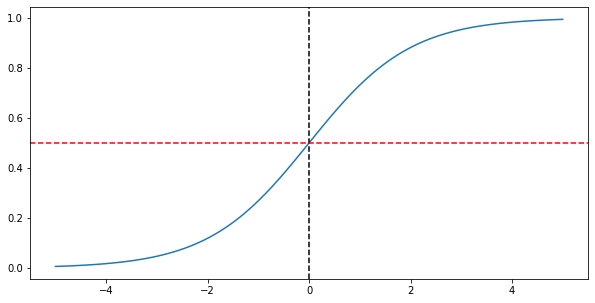

In [18]:
xs = np.linspace(-5,5,100)
ys = [1 / (1+np.exp(-z)) for z in xs]
plt.figure(figsize=(10,5))
plt.plot(xs,ys)
plt.axvline(0,0,c='k',ls='--')
plt.axhline(0.5,0,c='r',ls='--')

# **Funkcja sigmoid i próg decyzyjny w predykcji**

W algorytmach klasyfikacyjnych, takich jak regresja logistyczna, kluczowym elementem jest funkcja sigmoid. Przekształca ona wyniki liniowej funkcji decyzyjnej w prawdopodobieństwa, które mogą być następnie użyte do przypisywania próbek do klas za pomocą progu decyzyjnego.

---

## **Funkcja sigmoid**

Funkcja sigmoid, oznaczana jako $ \sigma(z) $, jest definiowana wzorem:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

gdzie:
- $ z $ to wynik funkcji liniowej $ z = w^T x + b $, gdzie $ w $ to wektor wag, $ x $ to wektor cech, a $ b $ to bias.

### **Właściwości funkcji sigmoid:**
1. **Zakres wartości**:
   - Funkcja sigmoid przekształca dowolne wartości $ z $ w przedział $ (0, 1) $, dzięki czemu może być interpretowana jako prawdopodobieństwo.

2. **Kształt**:
   - Funkcja sigmoid ma kształt litery "S" i przechodzi przez punkt $ (0, 0.5) $.
   - Dla $ z \to +\infty $: $ \sigma(z) \to 1 $.
   - Dla $ z \to -\infty $: $ \sigma(z) \to 0 $.

3. **Interpretacja**:
   - Wartość $ \sigma(z) $ reprezentuje prawdopodobieństwo przynależności próbki do klasy pozytywnej ($ y = 1 $).

---

## **Predykcja z użyciem funkcji sigmoid**

1. **Przekształcenie wyników liniowych na prawdopodobieństwa**:
   - Model wylicza wartość $ z = w^T x + b $ na podstawie cech wejściowych $ x $.
   - Funkcja sigmoid przekształca tę wartość na prawdopodobieństwo $ P(y=1|x) = \sigma(z) $.

2. **Przykład działania funkcji sigmoid**:
   - Jeśli $ z = 0 $: $ \sigma(z) = 0.5 $ (próbka jest równie prawdopodobna, aby należeć do obu klas).
   - Jeśli $ z > 0 $: $ \sigma(z) > 0.5 $ (model sugeruje klasę pozytywną).
   - Jeśli $ z < 0 $: $ \sigma(z) < 0.5 $ (model sugeruje klasę negatywną).

---

## **Próg decyzyjny (Decision Threshold)**

Próg decyzyjny to wartość, która określa, jak model przypisuje próbki do klas na podstawie prawdopodobieństw wygenerowanych przez funkcję sigmoid.

### **Jak działa próg decyzyjny?**
1. **Domyślny próg**:
   - Najczęściej stosowanym progiem jest $ 0.5 $. Jeśli $ P(y=1|x) \geq 0.5 $, model klasyfikuje próbkę jako należącą do klasy pozytywnej ($ y = 1 $), w przeciwnym razie do klasy negatywnej ($ y = 0 $).

2. **Modyfikacja progu**:
   - W niektórych problemach warto zmienić próg, aby dostosować model do konkretnego zadania:
     - **Zwiększenie progu** (np. $ 0.7 $):
       - Model staje się bardziej konserwatywny w przypisywaniu próbek do klasy pozytywnej.
       - Większa precyzja, ale mniejsza czułość.
     - **Zmniejszenie progu** (np. $ 0.3 $):
       - Model częściej przypisuje próbki do klasy pozytywnej.
       - Większa czułość, ale mniejsza precyzja.

3. **Przykład zastosowania**:
   - **Diagnoza chorób**:
     - Niski próg (np. $ 0.3 $) jest używany, aby minimalizować liczbę przeoczonych przypadków choroby (fałszywych negatywów).
   - **Wykrywanie spamu**:
     - Wyższy próg (np. $ 0.7 $) zmniejsza liczbę fałszywych alarmów (fałszywych pozytywów).

---

## **Podsumowanie**

1. Funkcja sigmoid przekształca wyniki modelu w prawdopodobieństwa, co pozwala na interpretację i podejmowanie decyzji.
2. Próg decyzyjny określa granicę, powyżej której próbka jest klasyfikowana jako pozytywna. Jego dobór zależy od konkretnego problemu i preferencji dotyczących precyzji i czułości.
3. Zrozumienie funkcji sigmoid i roli progu decyzyjnego jest kluczowe dla interpretacji wyników i dostosowywania modeli klasyfikacyjnych do różnych zadań.



# Metody Preprocessingu w klasyfikacji ML

Preprocessing danych jest kluczowym krokiem w procesie budowy modeli Machine Learning. Pomaga poprawić jakość danych oraz dostosować je do wymagań algorytmów klasyfikacji. Oto najczęściej stosowane techniki:

### 1. Skalowanie danych
- **StandardScaler**: Normalizacja cech do średniej 0 i odchylenia standardowego 1.
- **MinMaxScaler**: Skalowanie cech do zakresu [0, 1].
- **RobustScaler**: Skalowanie odporne na wartości odstające (oparte na medianie i IQR).

### 2. Usuwanie braków w danych
- Wypełnianie braków wartością średnią, medianą lub najczęstszą wartością (modą).
- Usuwanie rekordów lub cech z dużą liczbą braków.

### 3. Kodowanie cech
- **One-Hot Encoding**: Zamiana kategorii na macierz binarną.
- **Label Encoding**: Kodowanie kategorii jako liczb całkowitych.

### 4. Redukcja wymiarowości
- **PCA (Principal Component Analysis)**: Ekstrakcja głównych składowych dla redukcji wymiaru.
- **SelectKBest**: Wybór cech na podstawie statystycznych miar istotności.

### 5. Usuwanie szumu w danych
- Filtry eliminujące szum (np. średnia ruchoma lub filtry medianowe).

### 6. Rozwiązywanie niezbalansowanych klas
- **Oversampling**: Zwiększanie liczby próbek klasy mniejszościowej (np. SMOTE).
- **Undersampling**: Redukowanie liczby próbek klasy większościowej.
- **Ważenie klas**: Dopasowanie wag w algorytmie klasyfikacji.

### 7. Selekcja cech
- Usuwanie cech o niskiej wariancji.
- Wybór cech na podstawie korelacji z klasą docelową.

Preprocessing pozwala zwiększyć efektywność modelu i poprawić jego zdolność generalizacji, dlatego jest kluczowy w procesie budowy modeli ML.


Transformacje danych są kluczowym krokiem w preprocesingu, umożliwiającym poprawę jakości modeli uczenia maszynowego oraz ich wydajności. W zależności od charakteru danych i wymagań modelu, stosuje się różne typy transformacji.


## Dlaczego transformacje danych są ważne?

1. **Poprawa jakości danych**:
   - Usunięcie szumów, braków danych lub wartości odstających.
   - Zmiana formatu danych, aby były lepiej przystosowane do analizy.

2. **Poprawa wydajności modeli**:
   - Niektóre algorytmy (np. SVM, regresja logistyczna) wymagają określonych formatów danych, np. tych o zbliżonych skalach.
   - Transformacje mogą zwiększyć szybkość zbieżności algorytmów optymalizacyjnych.

3. **Lepsza interpretowalność**:
   - Transformacje mogą ułatwić interpretację wyników modelu lub wizualizację danych.
   
### **1. Skalowanie (Scaling)**

#### **1.1. Standaryzacja**
- **Cel**: Przekształcenie cech tak, aby miały średnią 0 i odchylenie standardowe 1.
- **Kiedy stosować?**:
  - Algorytmy wrażliwe na różnice w skali cech (np. SVM, kNN, PCA).
- **Wzór**:
  $$
  z = \frac{x - \mu}{\sigma}
  $$
  gdzie $$ \mu $$ to średnia, a $$ \sigma $$ to odchylenie standardowe.

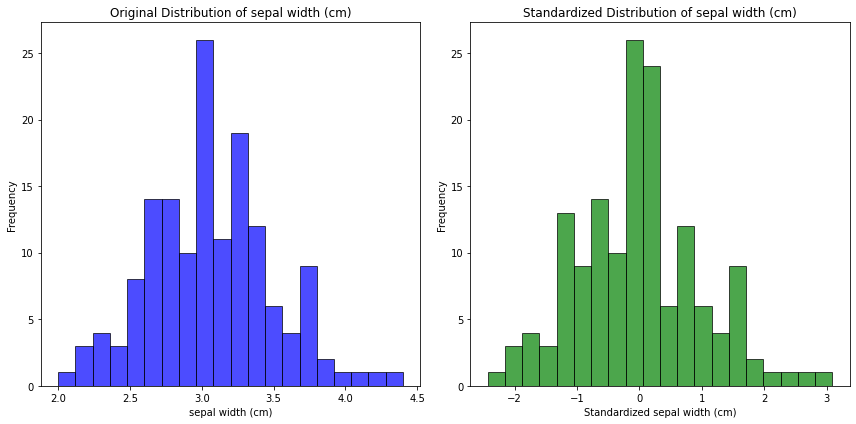

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

#Zbiór iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Selecting a single feature for demonstration
feature = 'sepal width (cm)'
values = df[feature]

# Standardize the feature
scaler = StandardScaler()
df[feature + '_scaled'] = scaler.fit_transform(values.values.reshape(-1, 1))

# Plot the distribution before and after standardization
plt.figure(figsize=(12, 6))

# Before standardization
plt.subplot(1, 2, 1)
plt.hist(values, bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title(f'Original Distribution of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')

# After standardization
plt.subplot(1, 2, 2)
plt.hist(df[feature + '_scaled'], bins=20, color='green', alpha=0.7, edgecolor='black')
plt.title(f'Standardized Distribution of {feature}')
plt.xlabel('Standardized ' + feature)
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#### **1.2. Normalizacja (Min-Max Scaling)**
- **Cel**: Przekształcenie cech na zakres \( [0, 1] \) lub \( [-1, 1] \).
- **Kiedy stosować?**:
  - Modele wymagające ograniczonych wartości (np. sieci neuronowe).
- **Wzór**:
  $$
  z = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
  $$

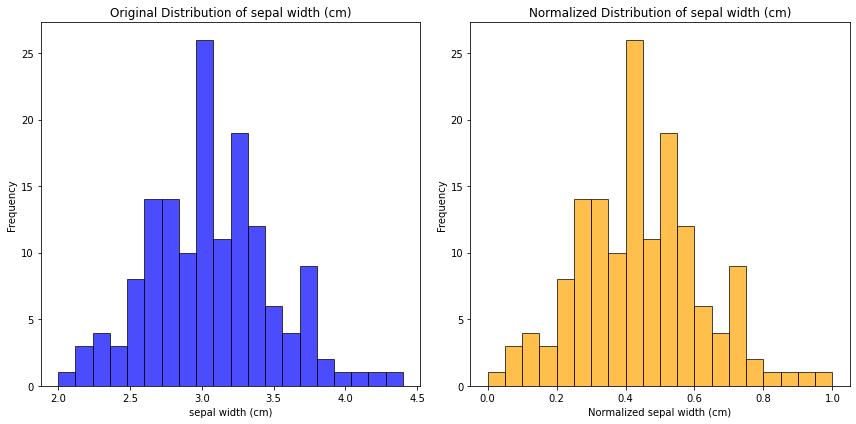

In [3]:
from sklearn.preprocessing import MinMaxScaler

# Select a single feature for demonstration
feature = 'sepal width (cm)'
values = df[feature].values

# Normalize the feature
scaler = MinMaxScaler(feature_range=(0, 1))
df[feature + '_normalized'] = scaler.fit_transform(values.reshape(-1, 1))

# Plot the distribution before and after normalization
plt.figure(figsize=(12, 6))

# Before normalization
plt.subplot(1, 2, 1)
plt.hist(values, bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.title(f'Original Distribution of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')

# After normalization
plt.subplot(1, 2, 2)
plt.hist(df[feature + '_normalized'], bins=20, color='orange', alpha=0.7, edgecolor='black')
plt.title(f'Normalized Distribution of {feature}')
plt.xlabel('Normalized ' + feature)
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### **2. Transformacje logarytmiczne (Log Transformation)**

- **Cel**: Zmniejszenie wpływu dużych wartości odstających i zmiana rozkładu danych na bardziej symetryczny.
- **Wzór**:
  $$
  z = \log(x + 1)
  $$
  *(Dodanie 1 zapobiega problemom z zerowymi wartościami).*

- **Kiedy stosować?**
  - Gdy dane mają rozkład potęgowy (np. dochody, wielkości populacji).

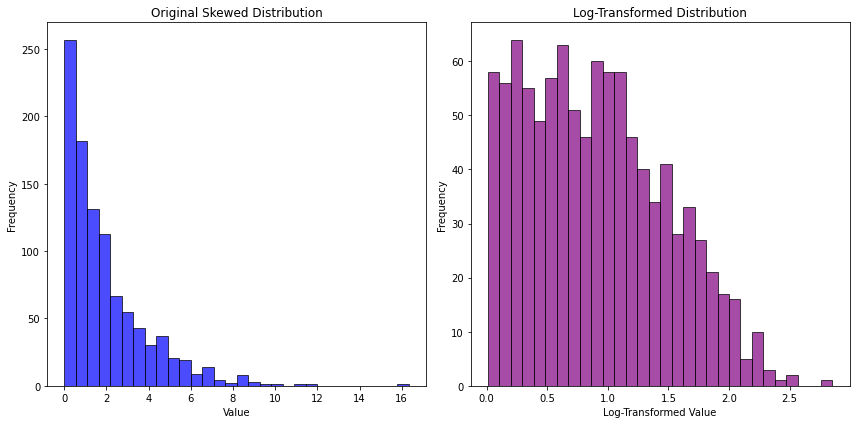

In [5]:
# Create a synthetic dataset with skewed data for demonstration
np.random.seed(42)
skewed_data = np.random.exponential(scale=2, size=1000)  # Highly skewed data

# Apply log transformation
log_transformed_data = np.log1p(skewed_data)  # Using log(1 + x) to handle zeros

# Plot the distribution before and after log transformation
plt.figure(figsize=(12, 6))

# Before log transformation
plt.subplot(1, 2, 1)
plt.hist(skewed_data, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Original Skewed Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# After log transformation
plt.subplot(1, 2, 2)
plt.hist(log_transformed_data, bins=30, color='purple', alpha=0.7, edgecolor='black')
plt.title('Log-Transformed Distribution')
plt.xlabel('Log-Transformed Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### **3. Root Transformation**

- **Cel**: Podobnie jak logarytm, redukuje wpływ dużych wartości, ale mniej agresywnie.
- **Wzór**:
  $$
  z = \sqrt{x}
  $$

- **Kiedy stosować?**
  - Dla danych z nieliniowymi zależnościami lub dużymi wartościami odstającymi.

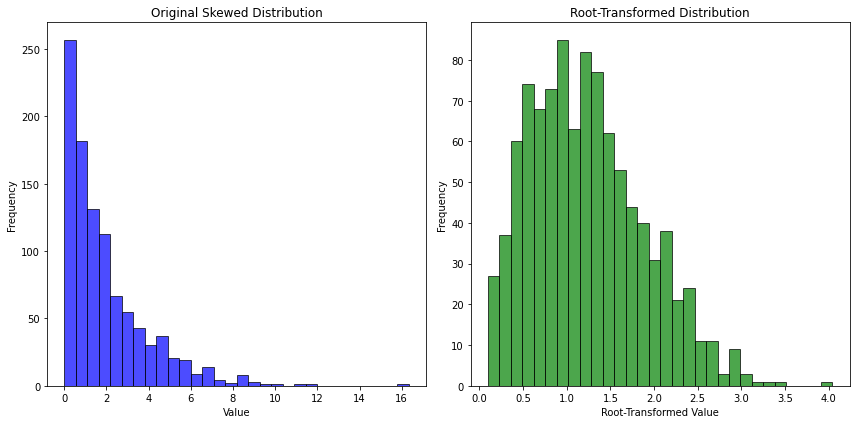

In [6]:
# Apply root transformation (square root) to the skewed data
root_transformed_data = np.sqrt(skewed_data)

# Plot the distribution before and after root transformation
plt.figure(figsize=(12, 6))

# Before root transformation
plt.subplot(1, 2, 1)
plt.hist(skewed_data, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Original Skewed Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# After root transformation
plt.subplot(1, 2, 2)
plt.hist(root_transformed_data, bins=30, color='green', alpha=0.7, edgecolor='black')
plt.title('Root-Transformed Distribution')
plt.xlabel('Root-Transformed Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### **4. Transformacje potęgowe (Box-Cox, Yeo-Johnson)**

#### **4.1. Box-Cox Transformation**
- **Cel**: Przekształcenie danych do rozkładu normalnego.
- **Wzór**:
  $$
  z = 
  \begin{cases} 
      \frac{x^\lambda - 1}{\lambda}, & \text{dla } \lambda \neq 0 \\
      \log(x), & \text{dla } \lambda = 0 
  \end{cases}
  $$

- **Kiedy stosować?**
  - Gdy model zakłada rozkład normalny danych, np. w regresji liniowej.

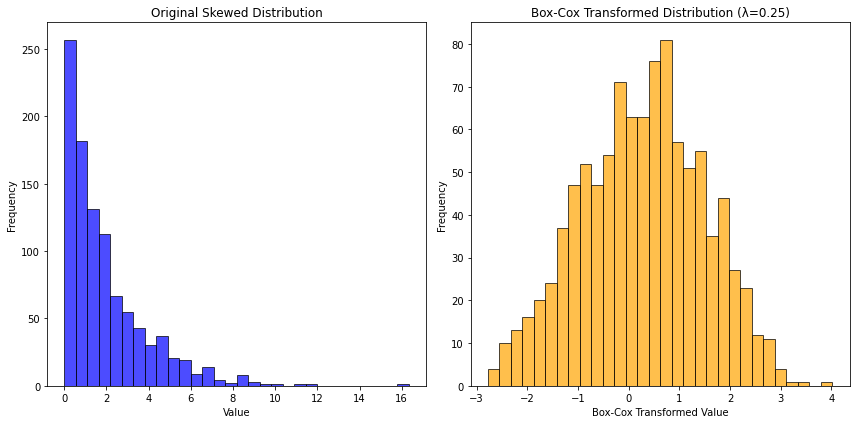

In [7]:
from scipy.stats import boxcox

# Apply Box-Cox transformation (requires all values to be positive)
# Adding a small constant to avoid zero values
boxcox_transformed_data, lambda_value = boxcox(skewed_data + 1e-6)

# Plot the distribution before and after Box-Cox transformation
plt.figure(figsize=(12, 6))

# Before Box-Cox transformation
plt.subplot(1, 2, 1)
plt.hist(skewed_data, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Original Skewed Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# After Box-Cox transformation
plt.subplot(1, 2, 2)
plt.hist(boxcox_transformed_data, bins=30, color='orange', alpha=0.7, edgecolor='black')
plt.title(f'Box-Cox Transformed Distribution (λ={lambda_value:.2f})')
plt.xlabel('Box-Cox Transformed Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### **5. Usuwanie wartości odstających**

Usuwanie wartości odstających może również być uważane za transformację danych.

- **Cel**: Zmniejszenie wpływu skrajnych wartości, które mogą negatywnie wpłynąć na model.
- **Metody**:
  - Przycinanie wartości do określonego przedziału.
  - Zastępowanie wartości odstających medianą lub średnią.

---

# Kodowanie Cech w Klasyfikacji

Kodowanie cech to proces przekształcania danych kategorycznych na reprezentację numeryczną, którą mogą przetwarzać algorytmy Machine Learning. Wyróżniamy kilka najczęściej stosowanych metod kodowania:

### 1. **One-Hot Encoding**
- Tworzy binarne kolumny dla każdej kategorii w cechach nominalnych.
- Używane, gdy cechy nie mają porządku (np. `Kolor: [Czerwony, Zielony, Niebieski]`).
- Przykład:
  - Wejście: `Kolor = [Czerwony, Zielony, Czerwony]`
  - Wyjście: `Czerwony = [1, 0, 0]`, `Zielony = [0, 1, 0]`, `Niebieski = [0, 0, 1]`.

### 2. **Label Encoding**
- Przekształca kategorie na liczby całkowite.
- Stosowane, gdy kategorie mają naturalny porządek (np. `Rozmiar: [Mały, Średni, Duży]`).
- Przykład:
  - Wejście: `Rozmiar = [Mały, Średni, Duży]`
  - Wyjście: `Mały = 0`, `Średni = 1`, `Duży = 2`.

### 3. **Binary Encoding**
- Kategoryczne dane są najpierw zakodowane jako liczby całkowite, a następnie konwertowane do reprezentacji binarnej.
- Zmniejsza wymiarowość w porównaniu z One-Hot Encoding.
- Przykład:
  - Wejście: `Kolor = [Czerwony, Zielony, Niebieski]`
  - Liczby całkowite: `Czerwony = 1, Zielony = 2, Niebieski = 3`
  - Binarnie: `Czerwony = 01, Zielony = 10, Niebieski = 11`.

### 4. **Target Encoding**
- Zastępuje kategorie średnią, medianą lub inną statystyką zmiennej docelowej w ramach danej kategorii.
- Przykład:
  - Wejście: `Kolor = [Czerwony, Zielony, Niebieski]`
  - Średnia celu: `Czerwony = 0.8, Zielony = 0.5, Niebieski = 0.3`.

### 5. **Frequency Encoding**
- Każdej kategorii przypisuje wartość odpowiadającą jej częstości występowania w danych.
- Przykład:
  - Wejście: `Kolor = [Czerwony, Zielony, Czerwony, Niebieski]`
  - Wyjście: `Czerwony = 2, Zielony = 1, Niebieski = 1`.

### Wybór Metody Kodowania
- **One-Hot Encoding**: Gdy brak naturalnego porządku w danych i cech jest niewiele.
- **Label Encoding**: Gdy istnieje porządek między kategoriami.
- **Target Encoding**: Przy danych z dużą liczbą kategorii, szczególnie w problemach z niskim zbalansowaniem klas.
- **Frequency Encoding**: W dużych zbiorach danych lub w modelach z automatyczną selekcją cech.

Kodowanie cech jest kluczowym krokiem w procesie przygotowywania danych do klasyfikacji i może znacząco wpłynąć na wydajność modelu.


## Zaawansowane algorytmy klasyfikacyjne
*Które analogicznie są zdolne do regresji*

### Gradient Boosting Machines (GBM)

Technika iteracyjnego budowania modeli na podstawie błędów z poprzednich. Popularne implementacje

    XGBoost
    LightGBM
    CatBoost
    
Algorytm GBM buduje model predykcyjny w postaci sekwencji prostych modeli (np. drzew decyzyjnych).
Każdy nowy model jest uczony na błędach poprzednich modeli, aby je poprawić.

Predykcje wszystkich wytrenowanych modeli są sumowane, uwzględniając ich wagę (regulowaną przez parametr learning rate).

Kontrola overfittingu jest niezwykle isototna i możliwa dzięki regularyzacji, np. przez parametry:

    Learning rate: Kontroluje wpływ każdego modelu na wynik.
    N_estimators: Liczba iteracji (drzew).
    Max depth: Maksymalna głębokość drzewa decyzyjnego.
    
    
Wady:

    Czas trenowania: GBM wymaga więcej zasobów obliczeniowych w porównaniu z prostszymi algorytmami, np. lasami losowymi.

    Wrażliwość na hiperparametry: Wymaga starannego dostrajania, aby osiągnąć optymalną wydajność.
    
    Overfitting: Przy niewłaściwych hiperparametrach może dopasowywać się zbyt mocno do danych treningowych.

<IPython.core.display.Javascript object>


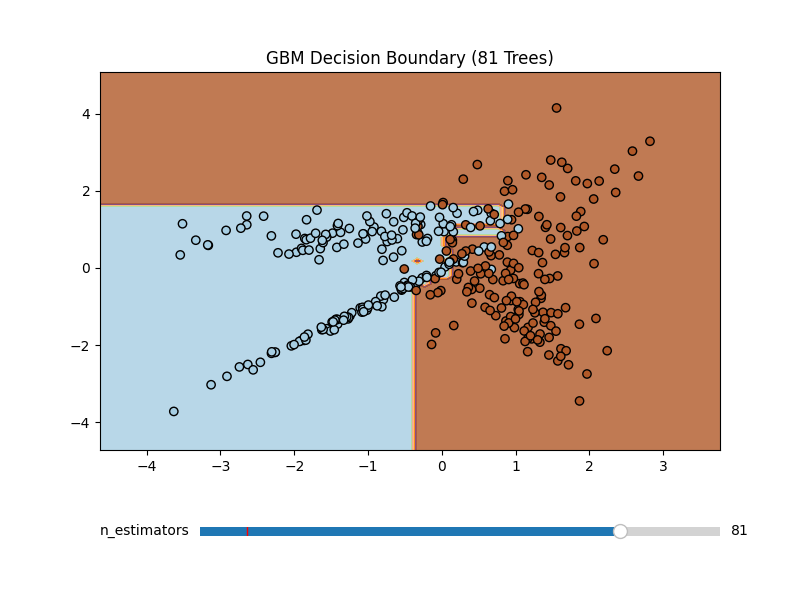

In [8]:
# Importowanie bibliotek
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Ustawienie interaktywnego trybu Matplotlib
%matplotlib notebook
# Generowanie syntetycznych danych
X, y = make_classification(
    n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2, random_state=13
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Funkcja do wizualizacji granic decyzyjnych
def plot_decision_boundary(model, X, y, ax, title=""):
    ax.clear()
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Paired)
    ax.set_title(title)
    return scatter

# Inicjalizacja wykresu
fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(bottom=0.25)

# Model początkowy
initial_trees = 10
gbm = GradientBoostingClassifier(n_estimators=initial_trees, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)
scatter = plot_decision_boundary(gbm, X_train, y_train, ax, title=f"GBM Decision Boundary ({initial_trees} Trees)")

# Suwak do regulacji liczby drzew
ax_slider = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor="lightgoldenrodyellow")
slider = Slider(ax_slider, "n_estimators", 1, 100, valinit=initial_trees, valstep=1)

# Aktualizacja wykresu przy zmianie wartości suwaka
def update(val):
    n_estimators = int(slider.val)
    updated_gbm = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=0.1, max_depth=3, random_state=42)
    updated_gbm.fit(X_train, y_train)
    plot_decision_boundary(updated_gbm, X_train, y_train, ax, title=f"GBM Decision Boundary ({n_estimators} Trees)")
    fig.canvas.draw_idle()

slider.on_changed(update)

plt.show()


## Bagging

Bagging (Bootstrap Aggregating) to jedna z technik ensemble learningu, która polega na trenowaniu wielu modeli na różnych podzbiorach danych, a następnie łączeniu ich wyników w celu poprawy dokładności i redukcji wariancji modelu.

Losowe podzbiory danych:

    Bagging tworzy wiele podzbiorów danych treningowych za pomocą techniki bootstrapu (próbkowanie z powtórzeniami).
    Każdy model w ensemble jest trenowany na innym podzbiorze danych, co zwiększa różnorodność modeli.

Łączenie wyników:

    W przypadku klasyfikacji stosuje się głosowanie większościowe (majority voting).
    W regresji wyniki modeli są uśredniane.

Redukcja wariancji:

    Bagging zmniejsza wariancję modelu, co sprawia, że jest mniej podatny na overfitting.
    
    
*Pasting* to wariant baggingu, gdzie prókowanie jest wykonywane bez powtórzeń. Przy dużej liczbie próbek danych, ta metoda może być efektywniejsza.
   
### Random Forest

Jeden z najpopularniejszych algorytmów baggingu. Składa się z wielu drzew decyzyjnych trenowanych na różnych podzbiorach danych. Dodatkowo, w trakcie budowy drzewa, losowy podzbiór cech jest wybierany w każdym węźle, co zwiększa różnorodność modeli.

### Extra Trees

Podobnie jak w Random Forest, każdy model (drzewo decyzyjne) jest trenowany na losowym podzbiorze danych (bootstrap lub bez bootstrapu w zależności od implementacji). W przeciwieństwie do Random Forest, Extra Trees losowo wybiera progi podziału dla każdej cechy zamiast optymalizować podział na podstawie kryterium, takiego jak entropia czy indeks Giniego. To oznacza, że podziały w drzewach są bardziej losowe.

### Zalety


Stabilność i odporność na szum:

    Bagging redukuje wpływ losowych błędów w danych treningowych.

Redukcja wariancji:

    Dzięki różnorodności modeli ensemble ma mniejszą tendencję do nadmiernego dopasowania do danych treningowych.

Elastyczność:

    Bagging może być używany z wieloma modelami bazowymi, np. drzewami decyzyjnymi, SVM czy regresją logistyczną.
    
### Wady

oszt obliczeniowy:

    Trening wielu modeli jednocześnie jest czasochłonny i wymaga większych zasobów obliczeniowych.

Brak poprawy biasu:

    Bagging nie zmniejsza błędu wynikającego z niedopasowania modelu bazowego (np. gdy jest zbyt prosty).
    


## Sieci Neuronowe

Sieci neuronowe to kluczowa technologia w uczeniu maszynowym, inspirowana strukturą i działaniem ludzkiego mózgu. Są one fundamentem współczesnego głębokiego uczenia i stosowane w takich zadaniach jak rozpoznawanie obrazów, przetwarzanie języka naturalnego czy systemy rekomendacyjne. To podstawa wielu, współczesnych i przełomowych algorytmów.

<img src='img/brain.png'/>


### Struktura sieci neuronowej

Neurony:

    Podstawowy element sieci, który przyjmuje dane wejściowe, mnoży je przez wagi, dodaje bias i przetwarza wynik przez funkcję aktywacji.
    
Neuron przyjmuje dane wejściowe, które są mnożone przez wagi, dodawany jest bias, a następnie wynik jest przetwarzany przez funkcję aktywacji:

$$
z = w_1x_1 + w_2x_2 + \dots + w_nx_n + b
$$

$$
a = f(z)
$$

Gdzie:
- $ x_i $: wartości wejściowe,
- $ w_i $: wagi połączeń,
- $ b $: bias (przesunięcie),
- $ f(z) $: funkcja aktywacji, która wprowadza nieliniowość,
- $ a $: wyjście neuronu.

#### Zapis w postaci wektorowej

Neuron przetwarza dane wejściowe za pomocą mnożenia macierzy wag przez wektor wejściowy, dodaje wektor bias i stosuje funkcję aktywacji:

$$
\mathbf{z} = \mathbf{W} \cdot \mathbf{x} + \mathbf{b}
$$

$$
\mathbf{a} = f(\mathbf{z})
$$

Gdzie:
- $\mathbf{x} $: wektor danych wejściowych $( n $-wymiarowy),
- $\mathbf{W} $: macierz wag $( m \times n $, gdzie $ m $ to liczba neuronów w warstwie),
- $ \mathbf{b} $: wektor bias $( m $-wymiarowy),
- $ f(\mathbf{z}) $: funkcja aktywacji stosowana element po elemencie,
- $ \mathbf{a} $: wektor wyjść neuronu ($ m $-wymiarowy).



### Warstwy sieci

    Warstwa wejściowa: Przyjmuje dane wejściowe.
    Warstwy ukryte: Przetwarzają dane, wykrywając wzorce. Mogą być wielowarstwowe (MLP - Multi-Layer Perceptron).
    Warstwa wyjściowa: Produkuje wynik (np. klasyfikacja, regresja).
    

<IPython.core.display.Javascript object>


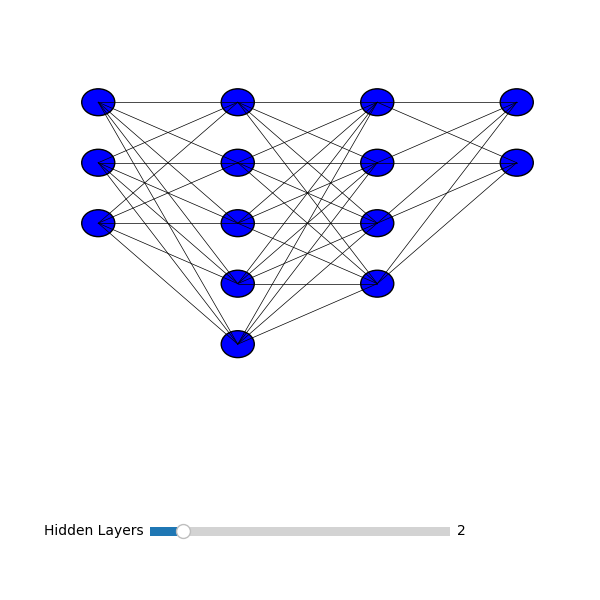

In [38]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

def draw_neural_net(ax, layer_sizes):
    """
    Draws a neural network diagram.
    Args:
        ax: matplotlib axis to draw on.
        layer_sizes: List with the number of neurons in each layer.
    """
    ax.clear()
    ax.axis("off")

    # Define spacing for layers and neurons
    v_spacing = 0.8 / float(max(layer_sizes))  # Vertical spacing
    h_spacing = 0.9 / float(len(layer_sizes) - 1)  # Horizontal spacing

    # Draw nodes
    for i, layer_size in enumerate(layer_sizes):
        for j in range(layer_size):
            x = i * h_spacing + 0.05  # Horizontal position
            y = 1 - (j * v_spacing + v_spacing / 2)  # Vertical position
            circle = plt.Circle((x, y), v_spacing / 4.5, color='blue', ec='black', lw=1)
            ax.add_artist(circle)

    # Draw edges
    for i, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        for j in range(layer_size_a):
            for k in range(layer_size_b):
                x_start = i * h_spacing + 0.05
                y_start = 1 - (j * v_spacing + v_spacing / 2)
                x_end = (i + 1) * h_spacing + 0.05
                y_end = 1 - (k * v_spacing + v_spacing / 2)
                line = plt.Line2D([x_start, x_end], [y_start, y_end], color='black', lw=0.5)
                ax.add_artist(line)

# Initial configuration
layer_sizes = [3, 5, 4, 2]

fig, ax = plt.subplots(figsize=(6, 6))
plt.subplots_adjust(bottom=0.25)
draw_neural_net(ax, layer_sizes)

# Slider for adjusting the number of hidden layers
ax_slider = plt.axes([0.25, 0.1, 0.5, 0.03], facecolor="lightgoldenrodyellow")
slider = Slider(ax_slider, "Hidden Layers", 1, 10, valinit=2, valstep=1)

def update(val):
    num_hidden_layers = int(slider.val)
    layer_sizes_new = [2] + [5] * num_hidden_layers + [2]  # Input, hidden, output
    draw_neural_net(ax, layer_sizes_new)
    fig.canvas.draw_idle()

slider.on_changed(update)

plt.show()


https://alexlenail.me/NN-SVG/index.html

### Architektura seci neuronowych

#### Warstwy

Warstwa wejściowa (Input Layer):

    Pierwsza warstwa w sieci.
    
    Liczba neuronów odpowiada liczbie cech w danych wejściowych.
    
    Przyjmuje dane wejściowe w postaci wektora, np. pikseli obrazu, atrybutów danych tablicowych czy sekwencji tekstowych.

Warstwy ukryte (Hidden Layers):

    Warstwy między warstwą wejściową a wyjściową. 
    
    Ich liczba i rozmiar zależą od złożoności zadania i ilości dostępnych danych. 
    
    Każdy neuron w warstwach ukrytych wykonuje liniową operację na danych wejściowych, a następnie stosuje funkcję aktywacji (np. ReLU, Sigmoid, Tanh), co pozwala modelować nieliniowe zależności.

Warstwa wyjściowa (Output Layer):

    Ostatnia warstwa sieci.
    
    Liczba neuronów zależy od zadania:
        Jeden neuron w regresji (wartość ciągła).
        Tyle neuronów, ile klas w klasyfikacji wieloklasowej (np. 3 klasy -> 3 neurony; ALE 2 klasy -> jeden).
    
    Funkcja aktywacji w warstwie wyjściowej zależy od zadania:
        Sigmoid: Dla klasyfikacji binarnej.
        Softmax: Dla klasyfikacji wieloklasowej.
        Brak aktywacji dla regresji (wynik to wartość ciągła).  

In [1]:
# Implementacja modelu sieci neuronowej
model = Sequential([
    Dense(4, activation='relu', input_shape=(X_train.shape[1],)),  # Warstwa ukryta
    Dense(1, activation='sigmoid')  # Warstwa wyjściowa dla klasyfikacji binarnej
])

# Kompilacja modelu
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Trenowanie modelu
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=8, verbose=1)

# Ocena modelu na zbiorze testowym
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

NameError: name 'Sequential' is not defined

C:\Users\kamil\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\training_arrays_v1.py:37: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.5)
  from scipy.sparse import issparse  # pylint: disable=g-import-not-at-top


Epoch 1/100
750/750 [==============================] - 2s 2ms/step - loss: 0.3280 - accuracy: 0.9073 - val_loss: 0.1958 - val_accuracy: 0.9451
Epoch 2/100
750/750 [==============================] - 1s 2ms/step - loss: 0.1490 - accuracy: 0.9575 - val_loss: 0.1362 - val_accuracy: 0.9622
Epoch 3/100
750/750 [==============================] - 1s 2ms/step - loss: 0.1062 - accuracy: 0.9690 - val_loss: 0.1220 - val_accuracy: 0.9627
Epoch 4/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0797 - accuracy: 0.9767 - val_loss: 0.1123 - val_accuracy: 0.9652
Epoch 5/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0652 - accuracy: 0.9809 - val_loss: 0.0918 - val_accuracy: 0.9717
Epoch 6/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0511 - accuracy: 0.9854 - val_loss: 0.0949 - val_accuracy: 0.9712
Epoch 7/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0413 - accuracy: 0.9881 - val_loss: 0.0879 - val_accuracy: 0.9735

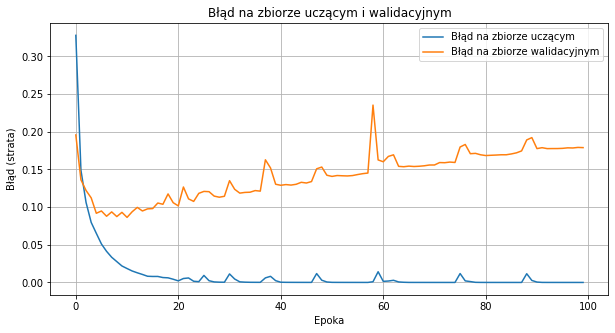

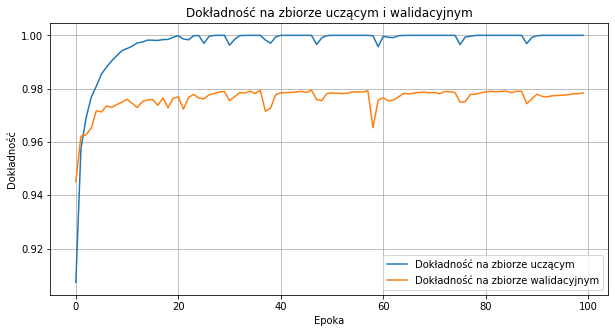

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Wczytanie i przygotowanie danych MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalizacja danych

# Spłaszczenie danych wejściowych
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Budowa prostej sieci neuronowej
model = Sequential([
    Dense(128, activation='relu', input_shape=(28*28,)),
    Dense(10, activation='softmax')  # Warstwa wyjściowa
])

# Kompilacja modelu
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Trenowanie modelu z podziałem na zbiór uczący i walidacyjny
history = model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=64, verbose=1)

# Wizualizacja strat
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Błąd na zbiorze uczącym')
plt.plot(history.history['val_loss'], label='Błąd na zbiorze walidacyjnym')
plt.title('Błąd na zbiorze uczącym i walidacyjnym')
plt.xlabel('Epoka')
plt.ylabel('Błąd (strata)')
plt.legend()
plt.grid(True)
plt.show()

# Wizualizacja dokładności (opcjonalnie)
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Dokładność na zbiorze uczącym')
plt.plot(history.history['val_accuracy'], label='Dokładność na zbiorze walidacyjnym')
plt.title('Dokładność na zbiorze uczącym i walidacyjnym')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()
plt.grid(True)
plt.show()


Liczba warstw: 1, Liczba neuronów: 32, Walidacyjna dokładność: 0.9553, Czas 5.03
Liczba warstw: 1, Liczba neuronów: 64, Walidacyjna dokładność: 0.9641, Czas 7.29
Liczba warstw: 1, Liczba neuronów: 128, Walidacyjna dokładność: 0.9729, Czas 9.60
Liczba warstw: 2, Liczba neuronów: 32, Walidacyjna dokładność: 0.9557, Czas 5.58
Liczba warstw: 2, Liczba neuronów: 64, Walidacyjna dokładność: 0.9694, Czas 6.47
Liczba warstw: 2, Liczba neuronów: 128, Walidacyjna dokładność: 0.9711, Czas 9.50
Liczba warstw: 3, Liczba neuronów: 32, Walidacyjna dokładność: 0.9585, Czas 5.84
Liczba warstw: 3, Liczba neuronów: 64, Walidacyjna dokładność: 0.9682, Czas 6.26
Liczba warstw: 3, Liczba neuronów: 128, Walidacyjna dokładność: 0.9730, Czas 9.88


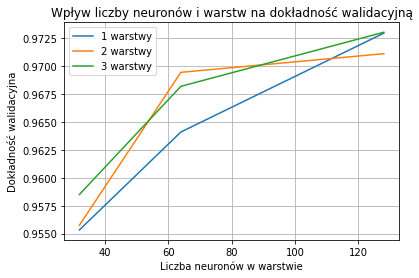

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from time import time

# Wczytanie i przygotowanie danych MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizacja danych
x_train = x_train / 255.0
x_test = x_test / 255.0

# Podział danych na zbiór treningowy i walidacyjny
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Przekształcenie danych wejściowych
x_train = x_train.reshape(-1, 28*28)
x_val = x_val.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Parametry do testowania
layer_configs = [1, 2, 3]  # Liczba warstw
neurons_configs = [32, 64, 128]  # Liczba neuronów w każdej warstwie

results = []

# Testowanie różnych konfiguracji
for num_layers in layer_configs:
    for num_neurons in neurons_configs:
        start = time()
        # Budowa modelu
        model = Sequential()
        model.add(Dense(num_neurons, activation='relu', input_shape=(28*28,)))
        for _ in range(num_layers - 1):
            model.add(Dense(num_neurons, activation='relu'))
        model.add(Dense(10, activation='softmax'))  # Warstwa wyjściowa
        
        # Kompilacja modelu
        model.compile(optimizer=Adam(learning_rate=0.001), 
                      loss='sparse_categorical_crossentropy', 
                      metrics=['accuracy'])
        
        # Trenowanie modelu
        history = model.fit(x_train, y_train, 
                            validation_data=(x_val, y_val), 
                            epochs=5, batch_size=64, verbose=0)
        
        # Ocena modelu
        val_accuracy = history.history['val_accuracy'][-1]
        results.append((num_layers, num_neurons, val_accuracy))
        end = time()
        print(f"Liczba warstw: {num_layers}, Liczba neuronów: {num_neurons}, Walidacyjna dokładność: {val_accuracy:.4f}, Czas {end-start:.2f}")
        

# Przedstawienie wyników
results_array = np.array(results)
for num_layers in layer_configs:
    plt.plot(neurons_configs, results_array[results_array[:, 0] == num_layers][:, 2], label=f'{num_layers} warstwy')

plt.title('Wpływ liczby neuronów i warstw na dokładność walidacyjną')
plt.xlabel('Liczba neuronów w warstwie')
plt.ylabel('Dokładność walidacyjna')
plt.legend()
plt.grid(True)
plt.show()


#### Rodzaje połączeń

Fully Connected (FC):

    Każdy neuron w jednej warstwie jest połączony z każdym neuronem w następnej warstwie.
    Stosowane w perceptronie wielowarstwowym (MLP) oraz w końcowych warstwach innych architektur.

Konwolucyjne (CNN):

    Każdy neuron jest połączony z lokalnym obszarem danych wejściowych.
    Używane do analizy obrazów, np. wykrywania krawędzi, wzorców.

Rekurencyjne (RNN):

    Połączenia między neuronami umożliwiają zapamiętywanie sekwencji i zależności czasowych. Są to połączenia zwrotne umożliwiające przepływ informacji z poprzednich kroków czasowych do nowych neuronów (pętla reukrencyjna). W każdym kroku czasowym (np. w sekwencji) dane wejściowe są łączone z pamięcią (stanem ukrytym), który zawiera informacje z wcześniejszych kroków.
    Wykorzystywane w analizie tekstu i danych sekwencyjnych.

Dokładność (FC): 0.9751, Czas: 0.04 s
Dokładność (CNN): 0.9905, Czas: 0.07 s
Dokładność (RNN): 0.9630, Czas: 0.13 s
Dokładność (LSTM): 0.9819, Czas: 101.73 s


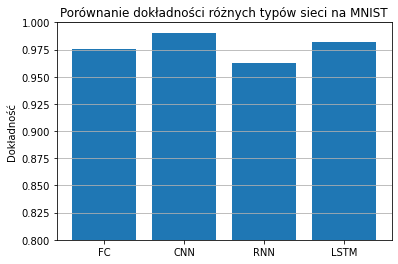

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, SimpleRNN, LSTM, Reshape
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from time import time

# Wczytanie i przygotowanie danych MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Dodanie wymiaru kanału dla CNN
x_train_cnn = x_train[..., np.newaxis]
x_test_cnn = x_test[..., np.newaxis]

# Przygotowanie danych dla RNN
x_train_rnn = x_train.reshape(-1, 28, 28)
x_test_rnn = x_test.reshape(-1, 28, 28)

# Funkcja do trenowania i oceny modelu
def train_and_evaluate(model, x_train, y_train, x_test, y_test, epochs=5):
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, verbose=0)
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    return test_accuracy

start = time()
# Fully Connected Network (FC)
fc_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
end = time()

fc_accuracy = train_and_evaluate(fc_model, x_train, y_train, x_test, y_test)
print(f"Dokładność (FC): {fc_accuracy:.4f}, Czas: {end-start:.2f} s")

start = time()
# Convolutional Neural Network (CNN)
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
end = time()

cnn_accuracy = train_and_evaluate(cnn_model, x_train_cnn, y_train, x_test_cnn, y_test)
print(f"Dokładność (CNN): {cnn_accuracy:.4f}, Czas: {end-start:.2f} s")

start = time()
# Recurrent Neural Network (RNN)
rnn_model = Sequential([
    SimpleRNN(128, activation='tanh', input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
end = time()


rnn_accuracy = train_and_evaluate(rnn_model, x_train_rnn, y_train, x_test_rnn, y_test)
print(f"Dokładność (RNN): {rnn_accuracy:.4f}, Czas: {end-start:.2f} s")
start = time()
# LSTM Network
lstm_model = Sequential([
    LSTM(128, activation='tanh', input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

lstm_accuracy = train_and_evaluate(lstm_model, x_train_rnn, y_train, x_test_rnn, y_test)
end  = time()
print(f"Dokładność (LSTM): {lstm_accuracy:.4f}, Czas: {end-start:.2f} s")

# Porównanie wyników
types = ['FC', 'CNN', 'RNN', 'LSTM']
accuracies = [fc_accuracy, cnn_accuracy, rnn_accuracy, lstm_accuracy]

plt.bar(types, accuracies)
plt.title('Porównanie dokładności różnych typów sieci na MNIST')
plt.ylabel('Dokładność')
plt.ylim(0.8, 1.0)
plt.grid(axis='y')
plt.show()


#### Kluczowe aspekty architektury sieci

Liczba warstw:
        
        Sieci płytkie: Mają niewiele warstw (1–2 warstwy ukryte). Używane do prostszych zadań.
        
        Sieci głębokie: Mają wiele warstw (10+ warstw). Stosowane w złożonych zadaniach, takich jak rozpoznawanie obrazów czy analiza języka.

Liczba neuronów w warstwach:
        
        Zbyt mało neuronów może ograniczyć zdolność modelu do nauki (niedouczenie, underfitting).
        
        Zbyt wiele neuronów może prowadzić do nadmiernego dopasowania (overfitting).

Funkcje aktywacji:
        
        Odpowiadają za wprowadzenie nieliniowości do sieci.
        
        Funkcje: ReLU (szybka konwergencja), Sigmoid, Tanh, Softmax.

Regularyzacja:
        
        Techniki takie jak Dropout, L2 (Ridge Regularization) i Batch Normalization pomagają w zapobieganiu nadmiernemu dopasowaniu.
        
#### Funkcje aktywacji 


Funkcje aktywacji wprowadzają nieliniowość do sieci neuronowej, co pozwala modelować złożone zależności między danymi wejściowymi a wyjściami. Oto najczęściej stosowane funkcje aktywacji:

---

#### 1. **Sigmoid**

- **Opis:**
  - Wartości wyjściowe są przekształcane do zakresu $[0, 1]$, co sprawia, że sigmoid dobrze nadaje się do klasyfikacji binarnej.
  - Wrażliwa na problem zanikającego gradeintu.
  
- **Wzór:**
  $$
  \sigma(x) = \frac{1}{1 + e^{-x}}
  $$

- **Przykładowy zakres:**
  - Dla $x \to \infty$: $\sigma(x) \to 1$,
  - Dla $x \to -\infty$: $\sigma(x) \to 0$.

---

#### 2. **ReLU (Rectified Linear Unit)**

- **Opis:**
  - Funkcja ReLU zwraca $0$ dla wartości ujemnych i wartość wejściową dla wartości dodatnich.
  - Jest szybka w obliczeniach i często używana w warstwach ukrytych.
  - Wygasza niektóre neurony, gdy ich gradient wynosi <0

- **Wzór:**
  $$
  f(x) = \max(0, x)
  $$

- **Przykładowy zakres:**
  - Dla $x \geq 0$: $f(x) = x$,
  - Dla $x < 0$: $f(x) = 0$.


---

#### 3. **Tanh (Hyperbolic Tangent)**

- **Opis:**
  - Podobna do sigmoid, ale wartości wyjściowe są w zakresie $[-1, 1]$, co czyni ją bardziej symetryczną dla danych o dodatnich i ujemnych wartościach.
  - Jej środkowa wartość to 0, ułatwiając propagację sygnału.
  - Jest efektywniejsza niż sigmoid dla warstw ukrytych.

- **Wzór:**
  $$
  f(x) = \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
  $$

- **Przykładowy zakres:**
  - Dla $x \to \infty$: $f(x) \to 1$,
  - Dla $x \to -\infty$: $f(x) \to -1$.

---

#### 4. **Softmax**

- **Opis:**
  - Stosowana w klasyfikacji wieloklasowej. Zamienia wyniki w wektorze na prawdopodobieństwa, których suma wynosi $1$.

- **Wzór:**
  $$
  f_i(x) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}
  $$

- **Przykład:**
  - Dla wektora $[x_1, x_2, x_3]$, softmax zwraca prawdopodobieństwa przypisania do każdej klasy.

---

#### 5. **Leaky ReLU**

- **Opis:**
  - Modyfikacja ReLU, która pozwala na niewielki przepływ gradientu dla wartości ujemnych, redukując problem "martwych neuronów".

- **Wzór:**
  $$
  f(x) =
  \begin{cases} 
  x & \text{dla } x \geq 0, \\
  \alpha x & \text{dla } x < 0.
  \end{cases}
  $$

- **Przykład:**
  - Typowa wartość $\alpha$ to $0.01$.

---

#### 6. **ELU (Exponential Linear Unit)**

- **Opis:**
  - Podobna do ReLU, ale dla wartości ujemnych zwraca wygładzoną funkcję wykładniczą, co może przyspieszyć naukę.
  - Kosztowna w trenowaniu.

- **Wzór:**
  $$
  f(x) =
  \begin{cases} 
  x & \text{dla } x > 0, \\
  \alpha (e^x - 1) & \text{dla } x \leq 0.
  \end{cases}
  $$

- **Przykład:**
  - Typowa wartość $\alpha$ to $1.0$.

---

#### 7. **Swish**

- **Opis:**
  - Nowoczesna funkcja aktywacji używana w zaawansowanych sieciach, jak EfficientNet. Jest to kombinacja sigmoid i wartości liniowej.
  - Dedykowana głębokim sieciom

- **Wzór:**
  $$
  f(x) = x \cdot \sigma(x)
  $$

- **Przykładowy zakres:**
  - Dla $x > 0$: $f(x)$ zbliża się do $x$,
  - Dla $x < 0$: $f(x)$ jest mniejsze od $0$.

---

### **Podsumowanie**

| Funkcja  | Zakres wartości | Zastosowania                  |
|----------|-----------------|-------------------------------|
| Sigmoid  | $[0, 1]$        | Klasyfikacja binarna          |
| ReLU     | $[0, \infty)$   | Warstwy ukryte                |
| Tanh     | $[-1, 1]$       | Dane z wartościami ujemnymi   |
| Softmax  | $[0, 1]$        | Klasyfikacja wieloklasowa     |
| Leaky ReLU | $(-\infty, \infty)$ | Rozwiązanie martwych neuronów |
| ELU      | $(-\infty, \infty)$ | Szybsza konwergencja          |
| Swish    | $(-\infty, \infty)$ | Zaawansowane sieci (np. EfficientNet) |

Funkcje aktywacji powinny być dobierane w zależności od architektury sieci i rodzaju problemu.


<IPython.core.display.Javascript object>


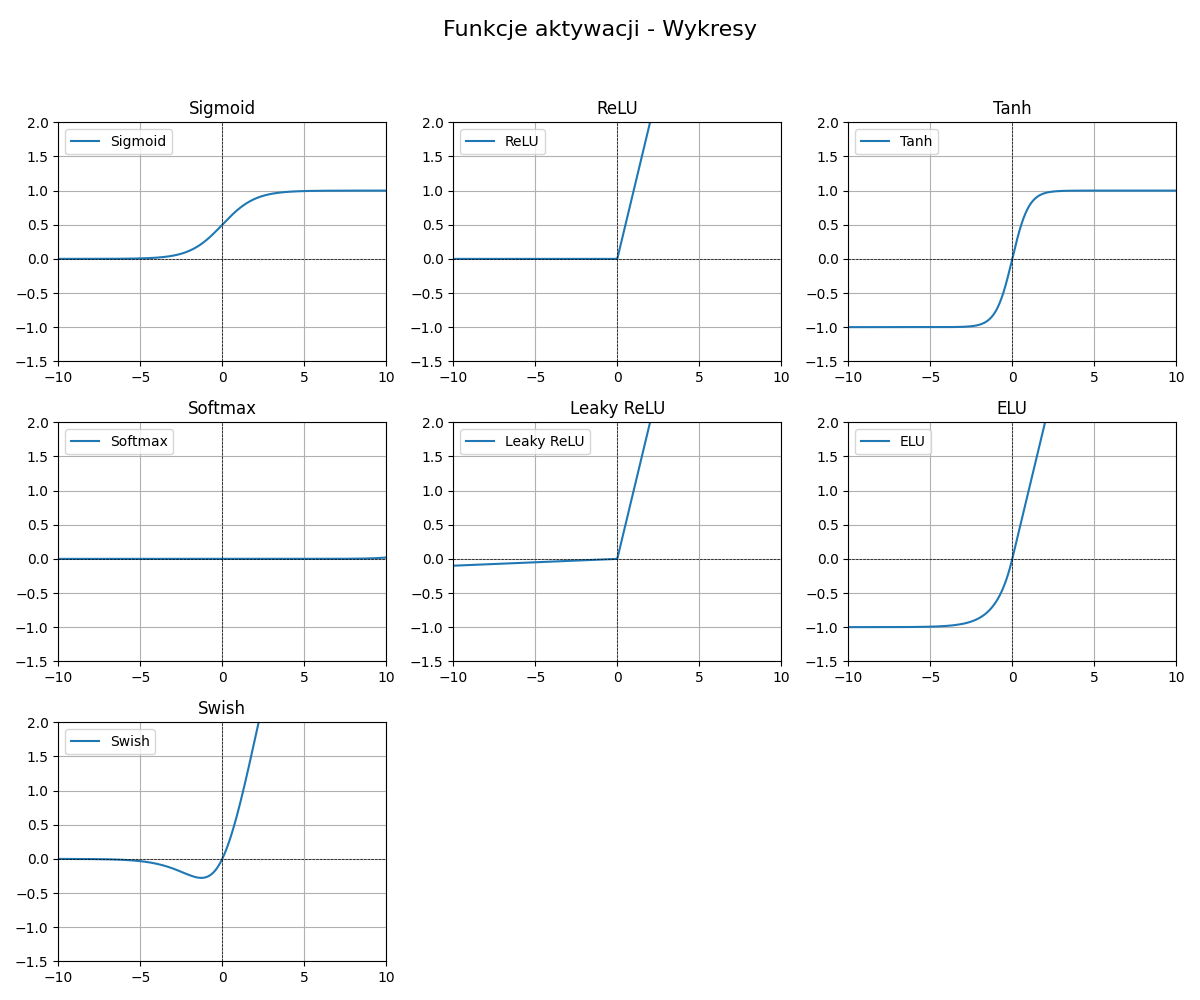

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Define functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum()

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def swish(x):
    return x * sigmoid(x)

# Define input range
x = np.linspace(-10, 10, 1000)

# Compute function outputs
functions = {
    "Sigmoid": sigmoid(x),
    "ReLU": relu(x),
    "Tanh": tanh(x),
    "Softmax": softmax(x),  # Softmax applied to all x values (illustrative purpose)
    "Leaky ReLU": leaky_relu(x),
    "ELU": elu(x),
    "Swish": swish(x)
}

# Create plots
fig, axes = plt.subplots(3, 3, figsize=(12, 10))
axes = axes.flatten()

for i, (name, output) in enumerate(functions.items()):
    ax = axes[i]
    ax.plot(x, output, label=name)
    ax.axhline(0, color='black', linewidth=0.5, linestyle='--')
    ax.axvline(0, color='black', linewidth=0.5, linestyle='--')
    ax.set_title(name, fontsize=12)
    ax.set_xlim(-10, 10)
    ax.set_ylim(-1.5, 2.0)
    ax.legend(loc="upper left")
    ax.grid(True)

# Hide any extra subplots (if fewer than 9)
for j in range(len(functions), len(axes)):
    axes[j].axis('off')

fig.suptitle("Funkcje aktywacji - Wykresy", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Trenowanie modelu z funkcją aktywacyjną: relu
Trenowanie modelu z funkcją aktywacyjną: sigmoid
Trenowanie modelu z funkcją aktywacyjną: tanh
Trenowanie modelu z funkcją aktywacyjną: swish


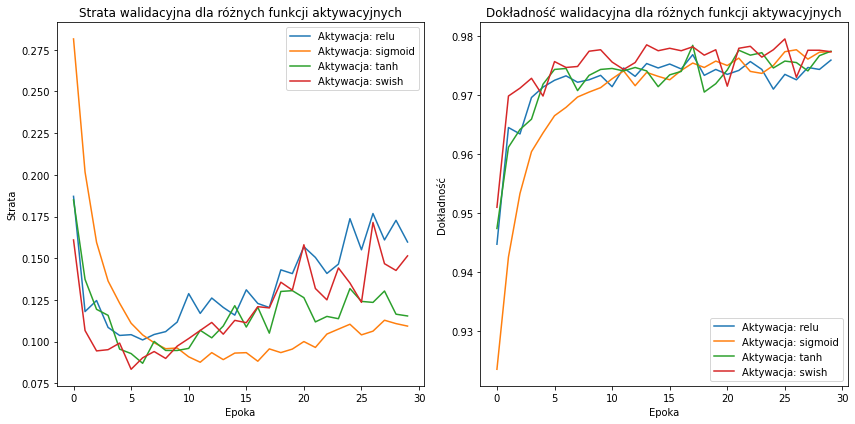

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Wczytanie i przygotowanie danych MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalizacja danych

# Spłaszczenie danych wejściowych
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Lista funkcji aktywacyjnych do przetestowania
activation_functions = ['relu', 'sigmoid', 'tanh', 'swish']
histories = {}

# Funkcja do budowy i trenowania modelu
def build_and_train_model(activation):
    model = Sequential([
        Dense(128, activation=activation, input_shape=(28*28,)),
        Dense(64, activation=activation),
        Dense(10, activation='softmax')  # Warstwa wyjściowa
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_split=0.2, epochs=30, batch_size=64, verbose=0)
    return history

# Trenowanie modeli z różnymi funkcjami aktywacyjnymi
for activation in activation_functions:
    print(f"Trenowanie modelu z funkcją aktywacyjną: {activation}")
    histories[activation] = build_and_train_model(activation)

# Wizualizacja wyników
plt.figure(figsize=(12, 6))

# Wykres strat
plt.subplot(1, 2, 1)
for activation in histories:
    plt.plot(histories[activation].history['val_loss'], label=f'Aktywacja: {activation}')
plt.title('Strata walidacyjna dla różnych funkcji aktywacyjnych')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.legend()

# Wykres dokładności
plt.subplot(1, 2, 2)
for activation in histories:
    plt.plot(histories[activation].history['val_accuracy'], label=f'Aktywacja: {activation}')
plt.title('Dokładność walidacyjna dla różnych funkcji aktywacyjnych')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()

plt.tight_layout()
plt.show()


### Metody regularyzacji sieci neuronowej


Regularyzacja w sieciach neuronowych to zestaw technik mających na celu poprawę generalizacji modelu i uniknięcie przeuczenia (overfittingu). Oto omówienie najczęściej stosowanych metod:

---

#### **1. L1 i L2 Regularization (Regularyzacja wag)**

Tak jak w modelach płytkich uczenia maszynowego.

##### **L1 Regularization**
- Dodaje do funkcji kosztu sumę wartości bezwzględnych wag. 
- Wymusza rzadkość wag (niektóre wagi stają się dokładnie równe 0).
- Wzór na funkcję kosztu:
  \[
  J(\theta) = J_{original} + \lambda \sum |w_i|
  \]

##### **L2 Regularization (Ridge)**
- Dodaje do funkcji kosztu sumę kwadratów wag.
- Penalizuje duże wartości wag, redukując ich wpływ na model.
- Najczęściej stosowana w praktyce.
- Wzór na funkcję kosztu:
  \[
  J(\theta) = J_{original} + \frac{\lambda}{2} \sum w_i^2
  \]

##### **Zastosowanie**
- L1 jest przydatna, gdy chcemy uzyskać rzadkie rozwiązanie.
- L2 stabilizuje model i jest bardziej efektywna w większości przypadków.

---

#### **2. Dropout**
- Tymczasowo usuwa losowo wybrane neurony (wraz z ich połączeniami) podczas trenowania modelu.
- Redukuje zależności między neuronami.
- W trakcie predykcji (testowania) uwzględnia wszystkie neurony i skaluje ich wagi.
- **Zalety**:
  - Prosta implementacja.
  - Bardzo skuteczna w przeciwdziałaniu przeuczeniu.
- **Wady**:
  - Wydłuża czas trenowania.

---

#### **3. Early Stopping**
- Monitoruje miarę walidacyjną (np. błąd walidacyjny) podczas trenowania modelu.
- Zatrzymuje trening, gdy metryka przestaje się poprawiać przez określoną liczbę epok.
- **Zalety**:
  - Zapobiega przeuczeniu bez dodatkowego obciążenia obliczeniowego.
- **Wady**:
  - Wymaga dobrej strategii monitorowania.

---

#### **4. Wzbogacenie danych**
- Powiększa zbiór danych treningowych, tworząc nowe próbki poprzez:
  - Obrót, przesunięcie, skalowanie, odwracanie (dla obrazów).
  - Dodawanie szumów (dla danych liczbowych, dźwiękowych lub tekstowych).
- **Zalety**:
  - Poprawia różnorodność danych.
- **Wady**:
  - Może wydłużyć czas trenowania.

---

#### **5. Batch Normalization**
- Normalizuje dane wejściowe każdej warstwy w sieci podczas trenowania, aby zachować spójność rozkładu danych.
- Dodaje dwa uczące się parametry (skala i przesunięcie) dla każdej warstwy.
- **Zalety**:
  - Stabilizuje proces trenowania.
  - Pozwala na użycie większych współczynników uczenia.
- **Wady**:
  - Dodatkowy narzut obliczeniowy.

---

#### **6. Weight Constraint (Ograniczenie wag)**
- Ogranicza wartości wag do określonego przedziału (np. poprzez normalizację lub maksymalną normę).
- Stabilizuje model i zapobiega eksplozji wag.
- **Zalety**:
  - Poprawa stabilności modelu.
- **Wady**:
  - Może wymagać dodatkowego strojenia parametrów.

Trenowanie modelu z regularyzacją: Brak
Trenowanie modelu z regularyzacją: L2
Trenowanie modelu z regularyzacją: Dropout
Trenowanie modelu z regularyzacją: BatchNorm


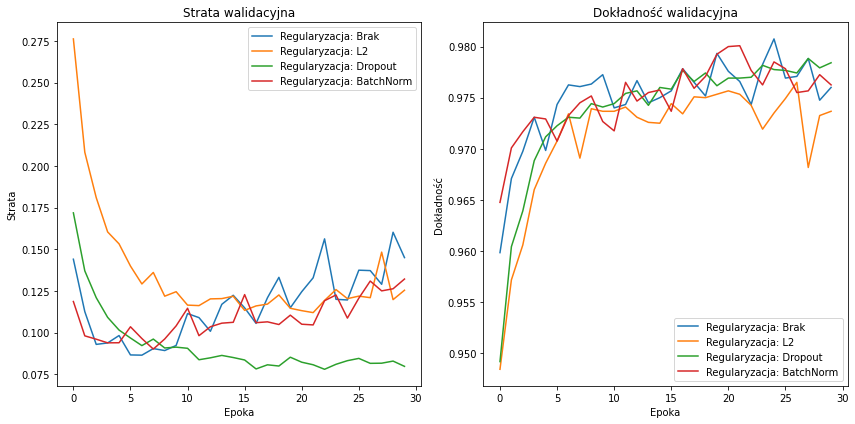

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Wczytanie i przygotowanie danych MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalizacja danych

# Przekształcenie danych wejściowych
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# Funkcja do budowy modelu
def build_model(reg_type=None):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(28*28,)))
    
    if reg_type == 'L2':
        model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    elif reg_type == 'Dropout':
        model.add(Dropout(0.5))
        model.add(Dense(128, activation='relu'))
    elif reg_type == 'BatchNorm':
        model.add(BatchNormalization())
        model.add(Dense(128, activation='relu'))
    else:
        model.add(Dense(128, activation='relu'))
    
    model.add(Dense(10, activation='softmax'))  # Warstwa wyjściowa
    model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

# Lista funkcji regularyzacyjnych do porównania
reg_types = [None, 'L2', 'Dropout', 'BatchNorm']
histories = {}

# Trenowanie modeli
for reg_type in reg_types:
    print(f"Trenowanie modelu z regularyzacją: {reg_type or 'Brak'}")
    model = build_model(reg_type)
    history = model.fit(x_train, y_train, validation_split=0.2, epochs=30, batch_size=64, verbose=0)
    histories[reg_type or 'Brak'] = history

# Wizualizacja wyników
plt.figure(figsize=(12, 6))

# Wykres strat
plt.subplot(1, 2, 1)
for reg_type in histories:
    plt.plot(histories[reg_type].history['val_loss'], label=f'Regularyzacja: {reg_type}')
plt.title('Strata walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.legend()

# Wykres dokładności
plt.subplot(1, 2, 2)
for reg_type in histories:
    plt.plot(histories[reg_type].history['val_accuracy'], label=f'Regularyzacja: {reg_type}')
plt.title('Dokładność walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()

plt.tight_layout()
plt.show()


### Propagacja w przód w sieci neuronowej

Forward propagation (propagacja w przód) to proces, w którym dane wejściowe przepływają przez sieć neuronową, przechodząc przez kolejne warstwy, aż do warstwy wyjściowej, gdzie generowany jest wynik. Jest to zatem proces generacji (obliczenia) wyniku. Ten proces jest elementem treningu i predykcji w sieci neuronowej.



#### **1. Proces w pojedynczym neuronie**

Działanie neuronu polega na przetworzeniu danych wejściowych poprzez:
1. Obliczenie sumy ważonej:
   $$
   z = \mathbf{w} \cdot \mathbf{x} + b
   $$
   Gdzie:
   - $\mathbf{w}$ to wektor wag,
   - $\mathbf{x}$ to wektor danych wejściowych,
   - $b$ to bias.

2. Zastosowanie funkcji aktywacji:
   $$
   a = f(z)
   $$
   Gdzie:
   - $f(z)$ to funkcja aktywacji, np. Sigmoid, ReLU, Tanh,
   - $a$ to wyjście neuronu.

---

#### **2. Proces w warstwie sieci**

W warstwie sieci, każdy neuron oblicza swoją wartość wyjściową, a dane wyjściowe warstwy stają się wejściami do kolejnej warstwy:
1. Macierzowe obliczenie sumy ważonej dla wszystkich neuronów:
   $$
   \mathbf{Z} = \mathbf{W} \cdot \mathbf{X} + \mathbf{b}
   $$
   Gdzie:
   - $\mathbf{W}$ to macierz wag (rozmiar $m \times n$ dla $n$ neuronów wejściowych i $m$ neuronów wyjściowych),
   - $\mathbf{X}$ to wektor danych wejściowych,
   - $\mathbf{b}$ to wektor bias dla wszystkich neuronów w warstwie.

2. Zastosowanie funkcji aktywacji dla całej warstwy:
   $$
   \mathbf{A} = f(\mathbf{Z})
   $$
   Gdzie:
   - $\mathbf{A}$ to wektor wyjść z warstwy,
   - $f(\mathbf{Z})$ to funkcja aktywacji zastosowana element po elemencie.

---

#### **3. Forward propagation w całej sieci**

Forward propagation działa iteracyjnie przez wszystkie warstwy sieci:

1. **Warstwa wejściowa:**
   - Dane wejściowe $\mathbf{X}$ są przekazywane do pierwszej warstwy ukrytej.

2. **Warstwy ukryte:**
   - Dla każdej warstwy $l$ obliczamy:
     $$
     \mathbf{Z}^{[l]} = \mathbf{W}^{[l]} \cdot \mathbf{A}^{[l-1]} + \mathbf{b}^{[l]}
     $$
     $$
     \mathbf{A}^{[l]} = f(\mathbf{Z}^{[l]})
     $$

3. **Warstwa wyjściowa:**
   - Ostatnia warstwa generuje wyniki:
     $$
     \mathbf{Z}^{[L]} = \mathbf{W}^{[L]} \cdot \mathbf{A}^{[L-1]} + \mathbf{b}^{[L]}
     $$
     $$
     \mathbf{A}^{[L]} = f(\mathbf{Z}^{[L]})
     $$
   Gdzie:
   - $L$ to liczba warstw w sieci.

---


#### **4. Efektywność obliczeniowa**

Forward propagation korzysta z operacji macierzowych, co czyni obliczenia efektywnymi, szczególnie przy wykorzystaniu akceleracji sprzętowej (np. GPU).


### 5. Przykład

### Przykład propagacji w przód w sieci z jedną warstwą ukrytą

#### **1. Założenia sieci**

- **Warstwa wejściowa:** 3 cechy wejściowe ($x_1, x_2, x_3$).
- **Warstwa ukryta:** 2 neurony z funkcją aktywacji ReLU.
- **Warstwa wyjściowa:** 1 neuron z funkcją aktywacji Sigmoid.
- **Dane wejściowe:** $x = [1, 2, 3]$.

---

#### **2. Wagi i biasy**

- **Wagi warstwy ukrytej:**
  $$
  \mathbf{W}^{[1]} =
  \begin{bmatrix}
  0.2 & 0.4 & 0.6 \\
  0.5 & 0.1 & 0.3
  \end{bmatrix}
  $$

- **Bias warstwy ukrytej:**
  $$
  \mathbf{b}^{[1]} =
  \begin{bmatrix}
  0.1 \\
  0.2
  \end{bmatrix}
  $$

- **Wagi warstwy wyjściowej:**
  $$
  \mathbf{W}^{[2]} =
  \begin{bmatrix}
  0.7 & 0.8
  \end{bmatrix}
  $$

- **Bias warstwy wyjściowej:**
  $$
  \mathbf{b}^{[2]} = 0.3
  $$

---

#### **3. Propagacja w przód**

##### **Warstwa ukryta*

1. Obliczenie sumy ważonej:
   $$
   \mathbf{Z}^{[1]} = \mathbf{W}^{[1]} \cdot \mathbf{x} + \mathbf{b}^{[1]}
   $$
   $$
   \mathbf{Z}^{[1]} =
   \begin{bmatrix}
   0.2 & 0.4 & 0.6 \\
   0.5 & 0.1 & 0.3
   \end{bmatrix}
   \cdot
   \begin{bmatrix}
   1 \\
   2 \\
   3
   \end{bmatrix}
   +
   \begin{bmatrix}
   0.1 \\
   0.2
   \end{bmatrix}
   =
   \begin{bmatrix}
   2.9 \\
   1.9
   \end{bmatrix}
   $$

2. Zastosowanie funkcji aktywacji (ReLU):
   $$
   \mathbf{A}^{[1]} = \text{ReLU}(\mathbf{Z}^{[1]})
   $$
   $$
   \mathbf{A}^{[1]} =
   \begin{bmatrix}
   \max(0, 2.9) \\
   \max(0, 1.9)
   \end{bmatrix}
   =
   \begin{bmatrix}
   2.9 \\
   1.9
   \end{bmatrix}
   $$

##### **Warstwa wyjściowa**
1. Obliczenie sumy ważonej:
   $$
   \mathbf{Z}^{[2]} = \mathbf{W}^{[2]} \cdot \mathbf{A}^{[1]} + \mathbf{b}^{[2]}
   $$
   $$
   \mathbf{Z}^{[2]} =
   \begin{bmatrix}
   0.7 & 0.8
   \end{bmatrix}
   \cdot
   \begin{bmatrix}
   2.9 \\
   1.9
   \end{bmatrix}
   + 0.3
   =
   0.7 \cdot 2.9 + 0.8 \cdot 1.9 + 0.3
   =
   4.33
   $$

2. Zastosowanie funkcji aktywacji (Sigmoid):
   $$
   \mathbf{A}^{[2]} = \sigma(\mathbf{Z}^{[2]})
   $$
   $$
   \mathbf{A}^{[2]} = \frac{1}{1 + e^{-4.33}} \approx 0.987
   $$

---

#### **4. Wynik końcowy**
Wyjście sieci neuronowej dla danych wejściowych $x = [1, 2, 3]$ wynosi:
$$
\mathbf{A}^{[2]} \approx 0.987
$$

---

### **Podsumowanie**
Proces propagacji w przód w sieci neuronowej z jedną warstwą ukrytą polega na:
1. Obliczeniu sumy ważonej dla każdej warstwy.
2. Zastosowaniu funkcji aktywacji do wyników każdej warstwy.
3. Przekazywaniu wyjść z jednej warstwy jako wejść do kolejnej warstwy.


### Propagacja wstecz (Backpropagation) w sieciach neuronowych

Propagacja wstecz to proces obliczania gradientów funkcji kosztu względem wag sieci neuronowej. Jest to kluczowy element procesu trenowania, ponieważ umożliwia optymalizację wag za pomocą algorytmów takich jak Stochastic Gradient Descent (SGD).

---

Wyobraź sobie sieć neuronową jako funkcję matematyczną, która bierze dane wejściowe (np. zdjęcie kota) i przekształca je na wyjście (np. przewidywanie, czy na zdjęciu jest kot). Funkcja ta opiera się na wagach, które są „przekładniami” pozwalającymi sieci generować odpowiedzi. Jeśli wagi są źle ustawione, sieć popełnia błędy.

#### Podczas trenowania sieci:

Propagacja w przód (forward propagation):
    
        Dane wejściowe przepływają przez sieć, a na końcu sieć generuje wynik (np. „kot” lub „nie kot”).
        
        Wynik jest porównywany z prawdziwą odpowiedzią (tzw. etykietą), co pozwala obliczyć błąd.

Propagacja wsteczna (backpropagation):

        Sieć „patrzy wstecz” na to, jak błąd powstał, i oblicza, które wagi były odpowiedzialne za jego powstanie.
        
        Każda waga w sieci jest oceniana pod kątem swojego wpływu na błąd.

Aktualizacja wag:

        Wagi są dostosowywane w kierunku, który zmniejszy błąd. Proces ten jest realizowany przez algorytm optymalizacji, np. Stochastic Gradient Descent (SGD).

#### Jak sieć oblicza poprawki?

Propagacja wsteczna opiera się na zasadzie „łańcuchowej zależności” (ang. chain rule). Wagi każdej warstwy są dostosowywane proporcjonalnie do tego, jak duży wpływ miały na ostateczny błąd.

Działa to w następujących krokach:

    Warstwa wyjściowa: Sieć oblicza, jak bardzo wynik różni się od oczekiwań.
    
    Warstwy ukryte: Sieć analizuje, jak każda warstwa ukryta przyczyniła się do błędu w warstwie wyjściowej.
    
    Warstwa wejściowa: Sieć „rozpływa” błąd aż do pierwszej warstwy, aby ocenić wkład każdego połączenia i wagi.
 

#### ** Etapy propagacji wstecz**

1. **Obliczanie błędu w warstwie wyjściowej:**
   - Dla warstwy wyjściowej gradient błędu obliczany jest jako różnica między przewidywaniem a rzeczywistą etykietą:
     $$
     \delta^{[L]} = \mathbf{A}^{[L]} - \mathbf{Y}
     $$

2. **Przepływ gradientów wstecz przez warstwy:**
   - Gradient w każdej warstwie ukrytej $l$ obliczany jest jako:
     $$
     \delta^{[l]} = (\mathbf{W}^{[l+1]})^T \delta^{[l+1]} \circ f'(\mathbf{Z}^{[l]})
     $$
     Gdzie:
     - $\circ$: iloczyn macierzy,
     - $f'(\mathbf{Z}^{[l]})$: pochodna funkcji aktywacji.

3. **Obliczanie gradientów wag i biasów:**
   - Gradient wag:
     $$
     \frac{\partial J}{\partial \mathbf{W}^{[l]}} = \delta^{[l]} (\mathbf{A}^{[l-1]})^T
     $$
   - Gradient biasów:
     $$
     \frac{\partial J}{\partial \mathbf{b}^{[l]}} = \delta^{[l]}
     $$

4. **Aktualizacja wag i biasów:**
   - Aktualizacja wag i biasów przy użyciu optymalizatora (np. SGD):
     $$
     \mathbf{W}^{[l]} = \mathbf{W}^{[l]} - \eta \frac{\partial J}{\partial \mathbf{W}^{[l]}}
     $$
     $$
     \mathbf{b}^{[l]} = \mathbf{b}^{[l]} - \eta \frac{\partial J}{\partial \mathbf{b}^{[l]}}
     $$

---

#### ** Przykład propagacji wstecz w sieci z jedną warstwą ukrytą**

**Założenia:**
- Warstwa wejściowa: 2 neurony,
- Warstwa ukryta: 2 neurony z funkcją aktywacji ReLU,
- Warstwa wyjściowa: 1 neuron z funkcją aktywacji Sigmoid,
- Funkcja kosztu: Binary Cross-Entropy.

**Dane wejściowe:**
$$
\mathbf{x} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad y = 1
$$

**Wagi i biasy:**
- Wagi i biasy dla warstwy ukrytej:
  $$
  \mathbf{W}^{[1]} = \begin{bmatrix} 0.2 & 0.4 \\ 0.1 & 0.6 \end{bmatrix}, \quad
  \mathbf{b}^{[1]} = \begin{bmatrix} 0.1 \\ 0.3 \end{bmatrix}
  $$
- Wagi i biasy dla warstwy wyjściowej:
  $$
  \mathbf{W}^{[2]} = \begin{bmatrix} 0.7 & 0.8 \end{bmatrix}, \quad
  \mathbf{b}^{[2]} = 0.2
  $$

**Etapy propagacji wstecz:**

1. **Propagacja w przód:**
   - Warstwa ukryta:
     $$
     \mathbf{Z}^{[1]} = \mathbf{W}^{[1]} \cdot \mathbf{x} + \mathbf{b}^{[1]} = \begin{bmatrix} 0.3 \\ 0.4 \end{bmatrix}
     $$
     $$
     \mathbf{A}^{[1]} = \text{ReLU}(\mathbf{Z}^{[1]}) = \begin{bmatrix} 0.3 \\ 0.4 \end{bmatrix}
     $$
   - Warstwa wyjściowa:
     $$
     \mathbf{Z}^{[2]} = \mathbf{W}^{[2]} \cdot \mathbf{A}^{[1]} + \mathbf{b}^{[2]} = 0.7 \cdot 0.3 + 0.8 \cdot 0.4 + 0.2 = 0.94
     $$
     $$
     \mathbf{A}^{[2]} = \sigma(\mathbf{Z}^{[2]}) = \frac{1}{1 + e^{-0.94}} \approx 0.719
     $$

2. **Obliczenie błędu wyjściowego:**
   $$
   \delta^{[2]} = \mathbf{A}^{[2]} - y = 0.719 - 1 = -0.281
   $$

3. **Gradienty w warstwie ukrytej:**
   $$
   \delta^{[1]} = (\mathbf{W}^{[2]})^T \delta^{[2]} \circ f'(\mathbf{Z}^{[1]})
   $$
   $$
   \delta^{[1]} = \begin{bmatrix} 0.7 \\ 0.8 \end{bmatrix} \cdot -0.281 \circ \begin{bmatrix} 1 \\ 1 \end{bmatrix} \approx \begin{bmatrix} -0.197 \\ -0.225 \end{bmatrix}
   $$

4. **Aktualizacja wag i biasów:**
   - Gradient wag:
     $$
     \frac{\partial J}{\partial \mathbf{W}^{[2]}} = \delta^{[2]} \cdot (\mathbf{A}^{[1]})^T \approx \begin{bmatrix} -0.084 \\ -0.112 \end{bmatrix}
     $$
   - Aktualizacja:
     $$
     \mathbf{W}^{[2]} = \mathbf{W}^{[2]} - \eta \cdot \frac{\partial J}{\partial \mathbf{W}^{[2]}}
     $$

---

#### **Podsumowanie**
Backpropagation jest procesem obliczania gradientów funkcji kosztu względem wag i biasów, propagując błędy od warstwy wyjściowej do wejściowej. Poprawne obliczenie gradientów umożliwia aktualizację parametrów sieci i optymalizację jej wydajności.
